<a href="https://colab.research.google.com/github/samyff12/Sales.Analysis/blob/main/EF_tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Final: Datos de Panel
## Samuel Francisco ID 1062508

### Paq

In [ ]:
install.packages('wooldridge')
install.packages('dplyr')
install.packages('tibble')
install.packages('ggplot2')
install.packages('panelvar')
install.packages('cowplot')
install.packages('plm')
install.packages('stargazer')
install.packages("ivreg", dependencies = TRUE)


library(wooldridge)
library(dplyr)
library(tibble)
library(ggplot2)
library(panelvar)
library(cowplot)
library(plm)
library(stargazer)
library(readr)
library(haven)

## **Ejercicio 1**

<h3> Utilice los datos de JEC.dta del paper de Porter (1983, Bell Journal of Economics) para estimar la
función de demanda de transporte ferroviario de granos. A partir de 1880 un cartel conocido como el
Joint Executive Committee (JEC) controla el transporte ferroviario de granos desde el Midwest hacia
las ciudades del este de EEUU. El cartel es anterior al Sherman Anitrust Act de 1890 y por lo tanto
operaba legalmente como cartel. Cada tanto, los miembros del cartel se desviaban del precio fijado por
el cartel provocando un colapso temporal del acuerdo colusivo. Es este ejercicio, utilizamos variaciones
en la oferta asociados al colapso del cartel para estimar la elasticidad de demanda del transporte
ferroviario de granos. Suponga que la función de demanda viene dada por:

\begin{eqnarray} 
\nonumber log(Qt) = \beta_{0} + \beta_{1}\mathrm{log(P_t)} + \beta_{2}\mathrm{Ice_t} + 
\sum_{j=2}\beta_{2+j}\mathrm{Seas}_{j,t} + {u_t}
\end{eqnarray}

<h3>donde Qt son las toneladas de granos transportadas en la semana t, Pt es el precio para el transporte
de una tonelada de granos por ferrocarril, Icet es una variable dummy igual a 1 si los Grandes Lagos
no son navegables por la presencia del hielo, y Seasj,t es una variable dummy que captura variaciones
de demanda por mes.

In [ ]:
dt <- read_dta("/content/JEC.dta")
summary(dt)

<h3>(a) Estime la ecuación de demanda por MCO. Interprete el resultado de la estimación.

In [ ]:
lq <- log(dt$quantity)
lp <- log(dt$price)

mco <- lm(lq ~ lp + ice + seas1 + seas2 + seas3 + seas4 + seas5 + seas6 + seas7 + seas8 + seas9 + seas10 + seas11 + seas12, data=dt)
summary(mco)


Call:
lm(formula = lq ~ lp + ice + seas1 + seas2 + seas3 + seas4 + 
    seas5 + seas6 + seas7 + seas8 + seas9 + seas10 + seas11 + 
    seas12, data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.39102 -0.24296  0.06575  0.28284  1.05884 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.861233   0.171361  51.711  < 2e-16 ***
lp          -0.638885   0.082389  -7.755 1.26e-13 ***
ice          0.447754   0.119604   3.744 0.000216 ***
seas1       -0.132822   0.110959  -1.197 0.232197    
seas2        0.066888   0.111298   0.601 0.548286    
seas3        0.111436   0.111308   1.001 0.317527    
seas4        0.155422   0.110743   1.403 0.161477    
seas5        0.109658   0.129918   0.844 0.399282    
seas6        0.046833   0.159596   0.293 0.769377    
seas7        0.122552   0.160041   0.766 0.444397    
seas8       -0.235008   0.159856  -1.470 0.142533    
seas9        0.003561   0.160021   0.022 0.982262    
seas10       0.169247   

- A partir de los resultados, vemos que la elasticidad precio de la demanda es de -63%. Mientras que si existe hielo en los Grandes Lagos, la demanda se ve aumentada en alrededor de 44%, controlando por los demás factores

<h3>(b) Explique por qué la interacción entre oferta y demanda puede hacer la estimación MCO inconsistente.

- La interacción entre oferta y demanda puede hacer la estimación MCO inconsistente debido a que esta interacción produce que los estimadores se desvíen del valor esperado conforme aumente la muestra.

- Además, según la teoría económica, los precios y cantidades se determinan por las interacciones de oferta y demanda. Por lo que, si incluyeramos un término de interacción sería complicado determinar qué ecuación se está estimando.

<h3>(c) Considere utilizar la variable cartel como un instrumento para log(Pt). Utilice el razonamiento
económico para justificar que cartel es un instrumento válido.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



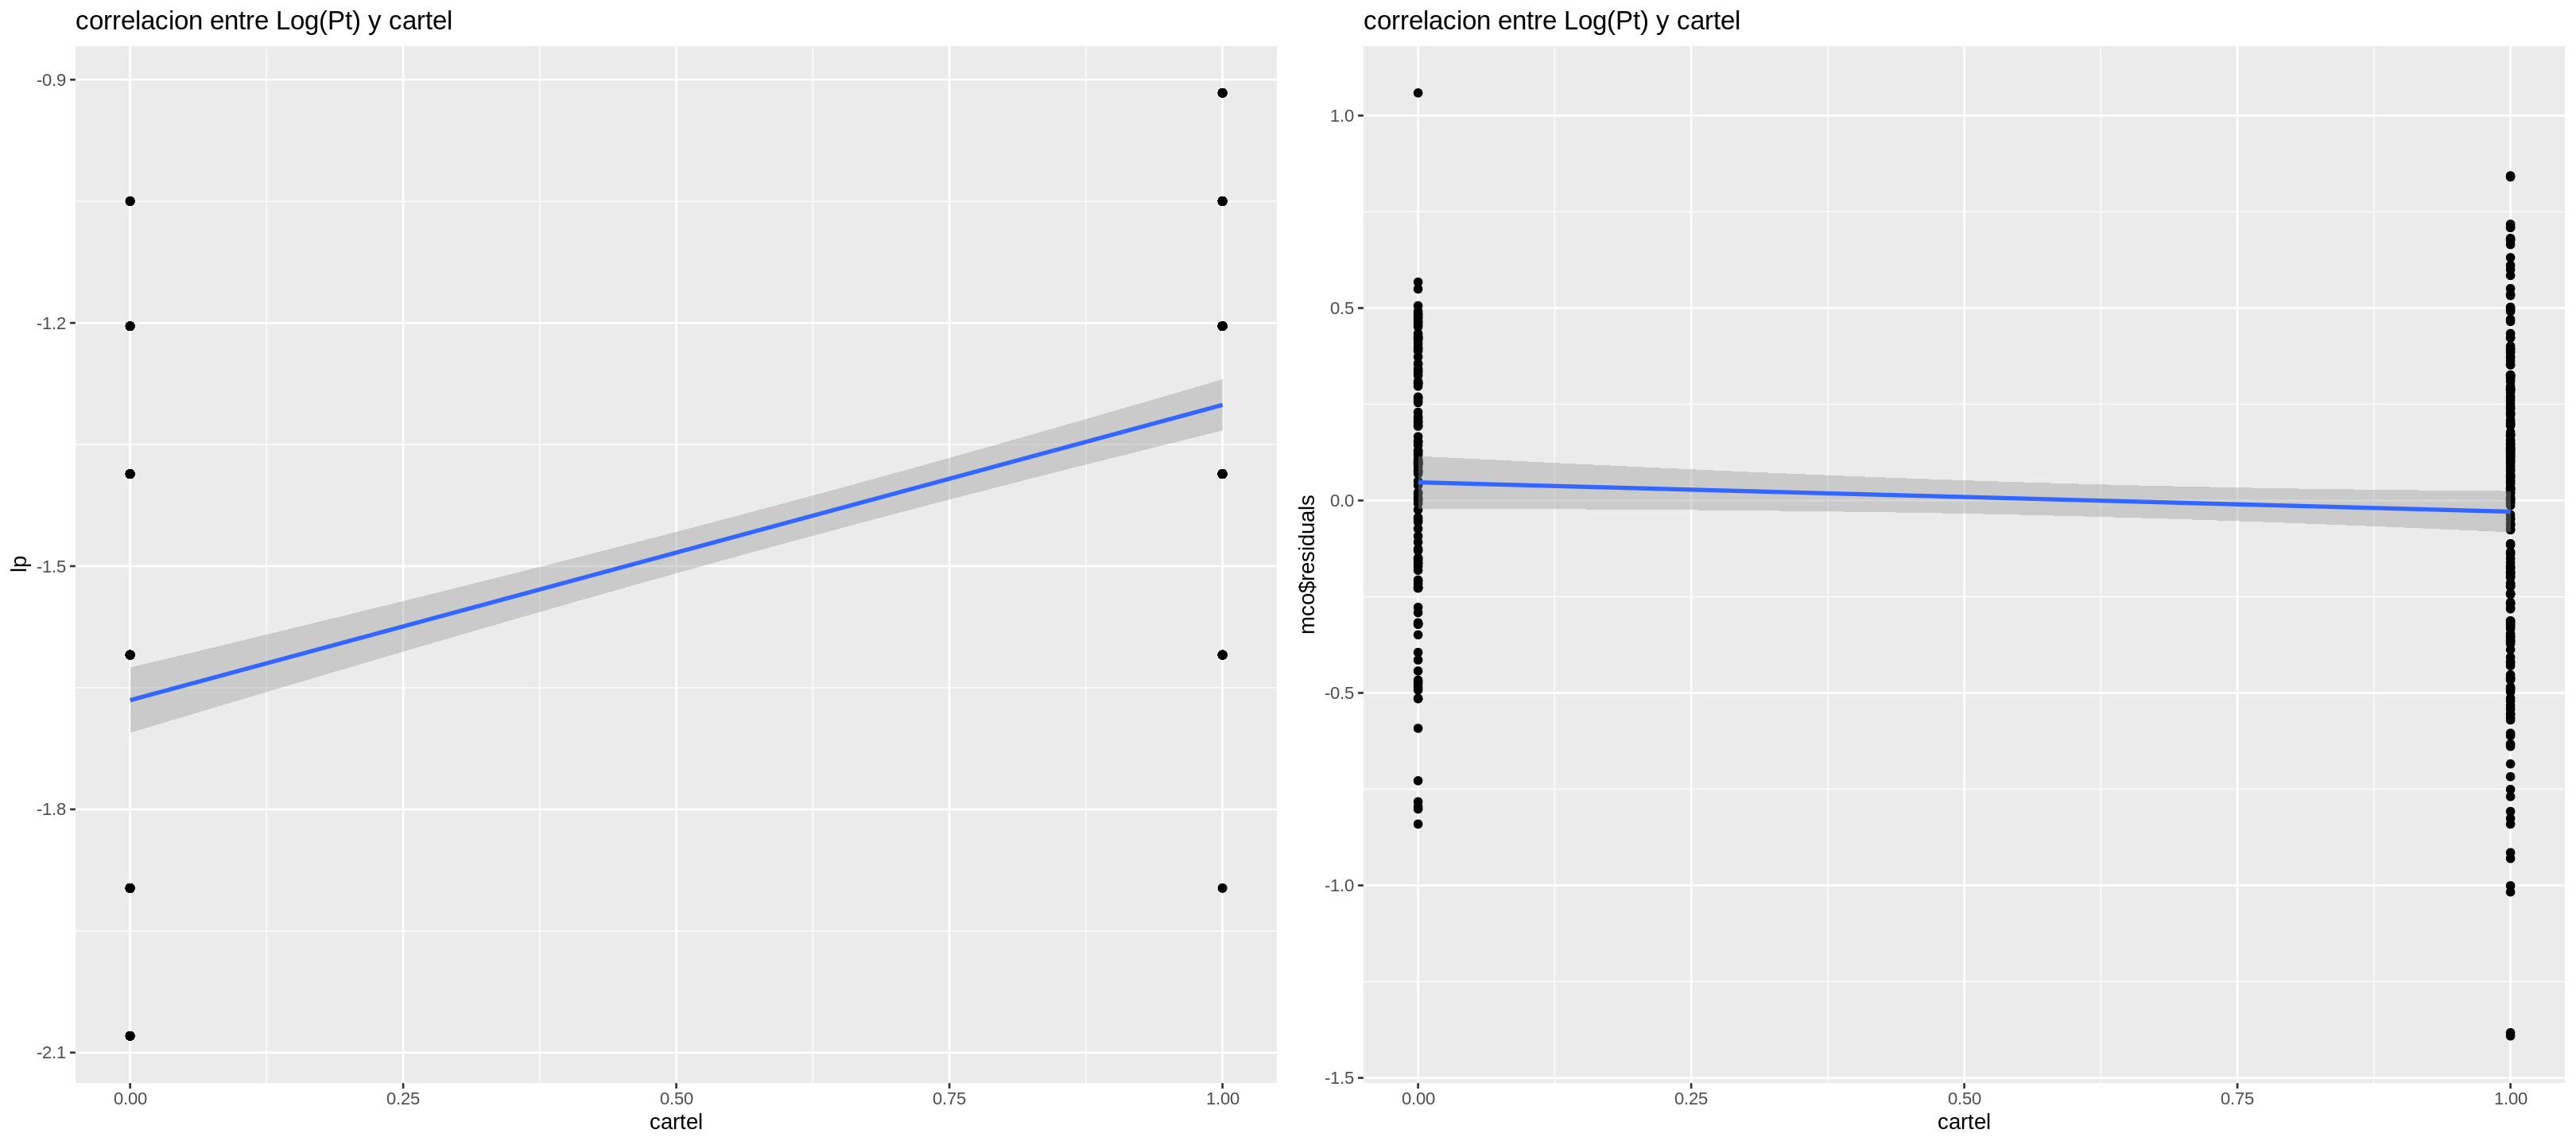

In [ ]:
dt %>% ggplot(aes(cartel, lp)) + geom_point() + geom_smooth(method=lm) + ggtitle("correlacion entre Log(Pt) y cartel") -> s1
dt %>% ggplot(aes(cartel, mco$residuals)) + geom_point() + geom_smooth(method=lm) + ggtitle("correlacion entre residuos y cartel") -> s2

plot_grid(s1, s2)

- Pareciera que la variable cartel pudiera utilizarse como instrumento a pesar de no ser numérica. No obstante, debemos realizar la estimación para ver si efectivamente produce mejores resultados

<h3>(d) Estime la primera etapa. Contraste el supuesto de relevancia.

In [ ]:
etapa1 <- lm(lp ~ cartel, data=dt)
summary(etapa1)


Call:
lm(formula = lp ~ cartel, data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59597 -0.23180 -0.08515  0.09717  0.61550 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.66532    0.02047  -81.37   <2e-16 ***
cartel       0.36418    0.02601   14.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2288 on 326 degrees of freedom
Multiple R-squared:  0.3755,	Adjusted R-squared:  0.3735 
F-statistic:   196 on 1 and 326 DF,  p-value: < 2.2e-16


<h3>(e) Estime la ecuación de demanda por IV.Interprete los resultados y compare con los resultados de
la estimación MCO.

In [ ]:
mcoIV <- lm(lq ~ predict(etapa1) + ice + seas1 + seas2 + seas3 + seas4 + seas5 + seas6 + seas7 + seas8 + seas9 + seas10 + seas11 + seas12, data=dt)
# stargazer(mco,mcoIV, type="html", title= "Comparación de modelos MCO vs IV", column.labels = c("MCO", "IV"))


<table style="text-align:center"><caption><strong>Comparación de modelos MCO vs IV</strong></caption>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="2"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="2" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="2">lq</td></tr>
<tr><td style="text-align:left"></td><td>MCO</td><td>IV</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">lp</td><td>-0.639<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(0.082)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">predict(etapa1)</td><td></td><td>-0.852<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.132)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">ice</td><td>0.448<sup>***</sup></td><td>0.393<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.120)</td><td>(0.124)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">seas1</td><td>-0.133</td><td>-0.165</td></tr>
<tr><td style="text-align:left"></td><td>(0.111)</td><td>(0.114)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">seas2</td><td>0.067</td><td>-0.027</td></tr>
<tr><td style="text-align:left"></td><td>(0.111)</td><td>(0.114)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">seas3</td><td>0.111</td><td>-0.028</td></tr>
<tr><td style="text-align:left"></td><td>(0.111)</td><td>(0.114)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">seas4</td><td>0.155</td><td>0.075</td></tr>
<tr><td style="text-align:left"></td><td>(0.111)</td><td>(0.114)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">seas5</td><td>0.110</td><td>0.058</td></tr>
<tr><td style="text-align:left"></td><td>(0.130)</td><td>(0.135)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">seas6</td><td>0.047</td><td>0.016</td></tr>
<tr><td style="text-align:left"></td><td>(0.160)</td><td>(0.165)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">seas7</td><td>0.123</td><td>0.118</td></tr>
<tr><td style="text-align:left"></td><td>(0.160)</td><td>(0.165)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">seas8</td><td>-0.235</td><td>-0.263</td></tr>
<tr><td style="text-align:left"></td><td>(0.160)</td><td>(0.165)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">seas9</td><td>0.004</td><td>-0.053</td></tr>
<tr><td style="text-align:left"></td><td>(0.160)</td><td>(0.166)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">seas10</td><td>0.169</td><td>0.173</td></tr>
<tr><td style="text-align:left"></td><td>(0.161)</td><td>(0.166)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">seas11</td><td>0.215</td><td>0.227</td></tr>
<tr><td style="text-align:left"></td><td>(0.160)</td><td>(0.164)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">seas12</td><td>0.220</td><td>0.169</td></tr>
<tr><td style="text-align:left"></td><td>(0.159)</td><td>(0.164)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">Constant</td><td>8.861<sup>***</sup></td><td>8.623<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.171)</td><td>(0.213)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Observations</td><td>328</td><td>328</td></tr>
<tr><td style="text-align:left">R<sup>2</sup></td><td>0.313</td><td>0.277</td></tr>
<tr><td style="text-align:left">Adjusted R<sup>2</sup></td><td>0.282</td><td>0.245</td></tr>
<tr><td style="text-align:left">Residual Std. Error (df = 313)</td><td>0.397</td><td>0.407</td></tr>
<tr><td style="text-align:left">F Statistic (df = 14; 313)</td><td>10.169<sup>***</sup></td><td>8.582<sup>***</sup></td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"><em>Note:</em></td><td colspan="2" style="text-align:right"><sup>*</sup>p<0.1; <sup>**</sup>p<0.05; <sup>***</sup>p<0.01</td></tr>
</table>

`geom_smooth()` using formula 'y ~ x'



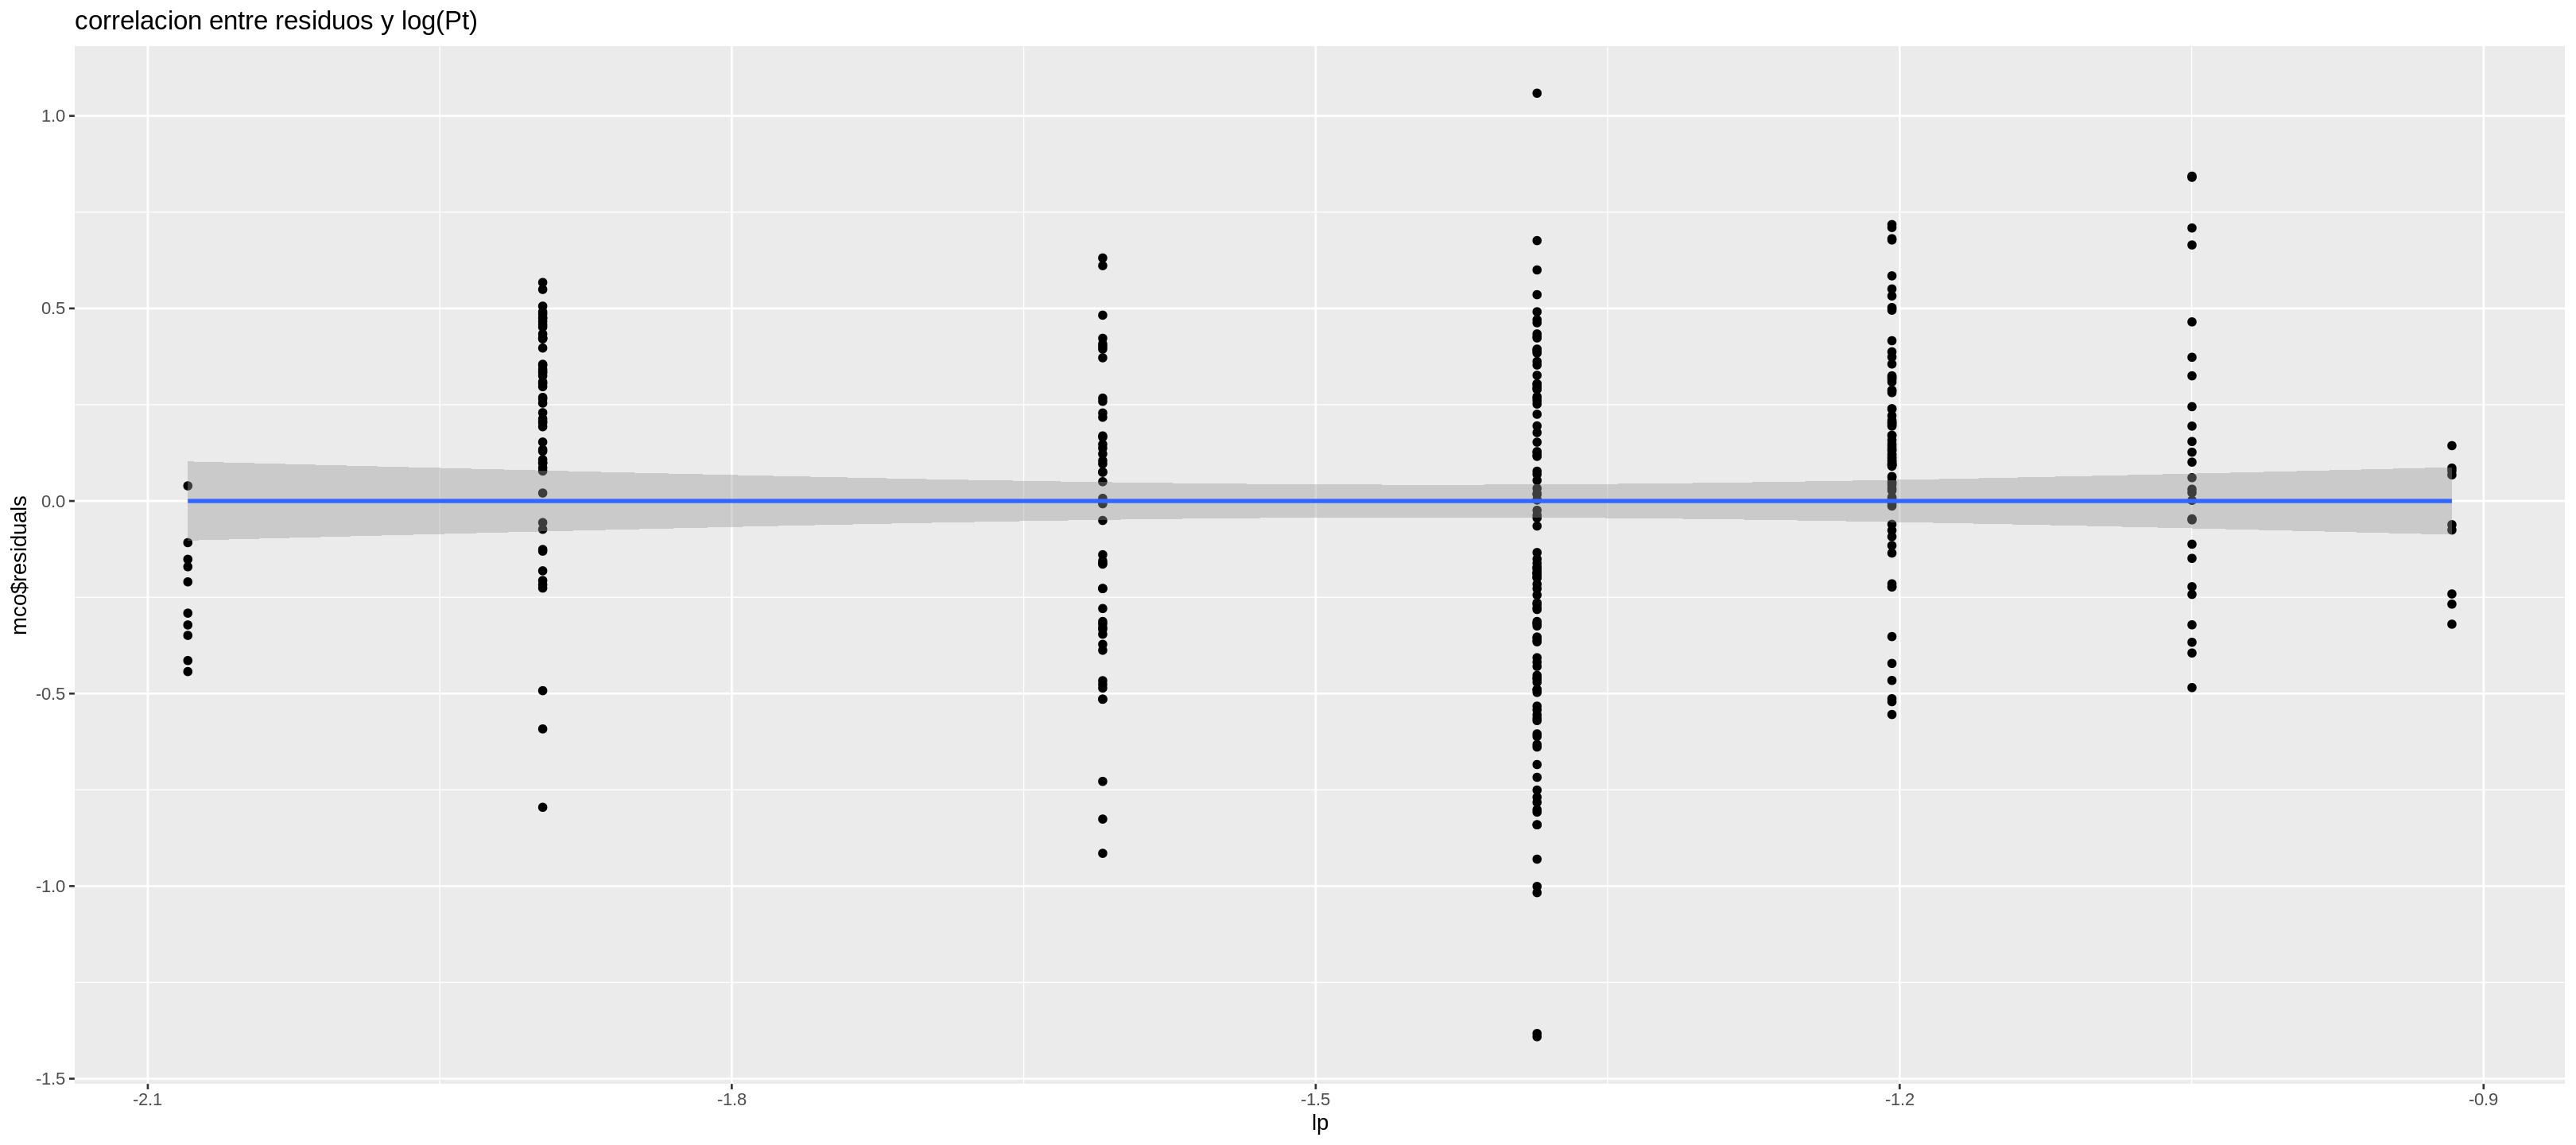

In [ ]:
dt %>% ggplot(aes(lp, mco$residuals)) + geom_point() + geom_smooth(method=lm) + ggtitle("correlacion entre residuos y log(Pt)")

- Según los resultados de los modelos, la estimación de log(precio) con la variable instrumental produce ligeramente un mayor efecto sobre la demanda, aunque con un error estándar mayor.

- Se considera el modelo MCO más adecuado para la estimación de la demanda puesto que no parece haber un problema de endogeneidad en la variable log(Pt)

## **Ejercicio 2**

<h3>En este ejercicio vamos a replicar el trabajo empírico realizado por Arellano y Bond (1991). Arellano-
Bond recopilaron un dataset de 1031 observaciones de panel de datos no balanceado de 140 empresas
en inglaterra desde 1976-1984. Las variables que se van a utilizar son el log empleo (n), el log de los
salarios reales (w) y el logaritmo del capital (k). Para acceder a los datos en R utilizar: 

`data("EmplUK",package = "plm")`

In [ ]:
data("EmplUK",package = "plm")
df <- as_tibble(EmplUK)
df$year <- as.integer(df$year)
head(df)

firm,year,sector,emp,wage,capital,output
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1977,7,5.041,13.1516,0.5894,95.7072
1,1978,7,5.600,12.3018,0.6318,97.3569
1,1979,7,5.015,12.8395,0.6771,99.6083
1,1980,7,4.715,13.8039,0.6171,100.5501
1,1981,7,4.093,14.2897,0.5076,99.5581
1,1982,7,3.166,14.8681,0.4229,98.6151


In [ ]:
df$wage <- log(df$wage)
df$capital <- log(df$capital)
df$emp <- log(df$emp)

<h3>(a) Reporte una tabla para 1976 y 1984 los principales estadísticos para los salarios reales, el capital
y el empleo.

In [ ]:
df %>% select(year, wage, capital, emp)  %>% 
      mutate(anios = case_when(  year == 1976 ~ "1976",
                                 year == 1984 ~ "1984",
                                 year != 1976 & year != 1984 ~ "Otros")) %>% 
      group_by(anios) %>% 
      summarise(salariom = mean(wage, na.rm = T),
                capitalm = mean(capital, na.rm = T),
                empleom = mean(emp, na.rm = T))

anios,salariom,capitalm,empleom
<chr>,<dbl>,<dbl>,<dbl>
1976,3.236799,-0.2912279,1.2392116
1984,3.107475,-1.1924890,0.2606245
Otros,3.136152,-0.4260165,1.0703926


- Ha ocurrido una reducción en todos las variables macroeconómicas, al comparar los años 1976 y 1984

<h3>(b) Reporte en una histograma o en una densidad kernel, la distribución de los salarios reales, el
capital y el empleo, para 1976 y para 1984. Observa algún cambio en la distribución en el tiempo.

In [ ]:
df1 <- df %>% select(year, wage, capital, emp) %>% filter(year == c(1976,1984))


Warning message in year == c(1976, 1984):
“longer object length is not a multiple of shorter object length”


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



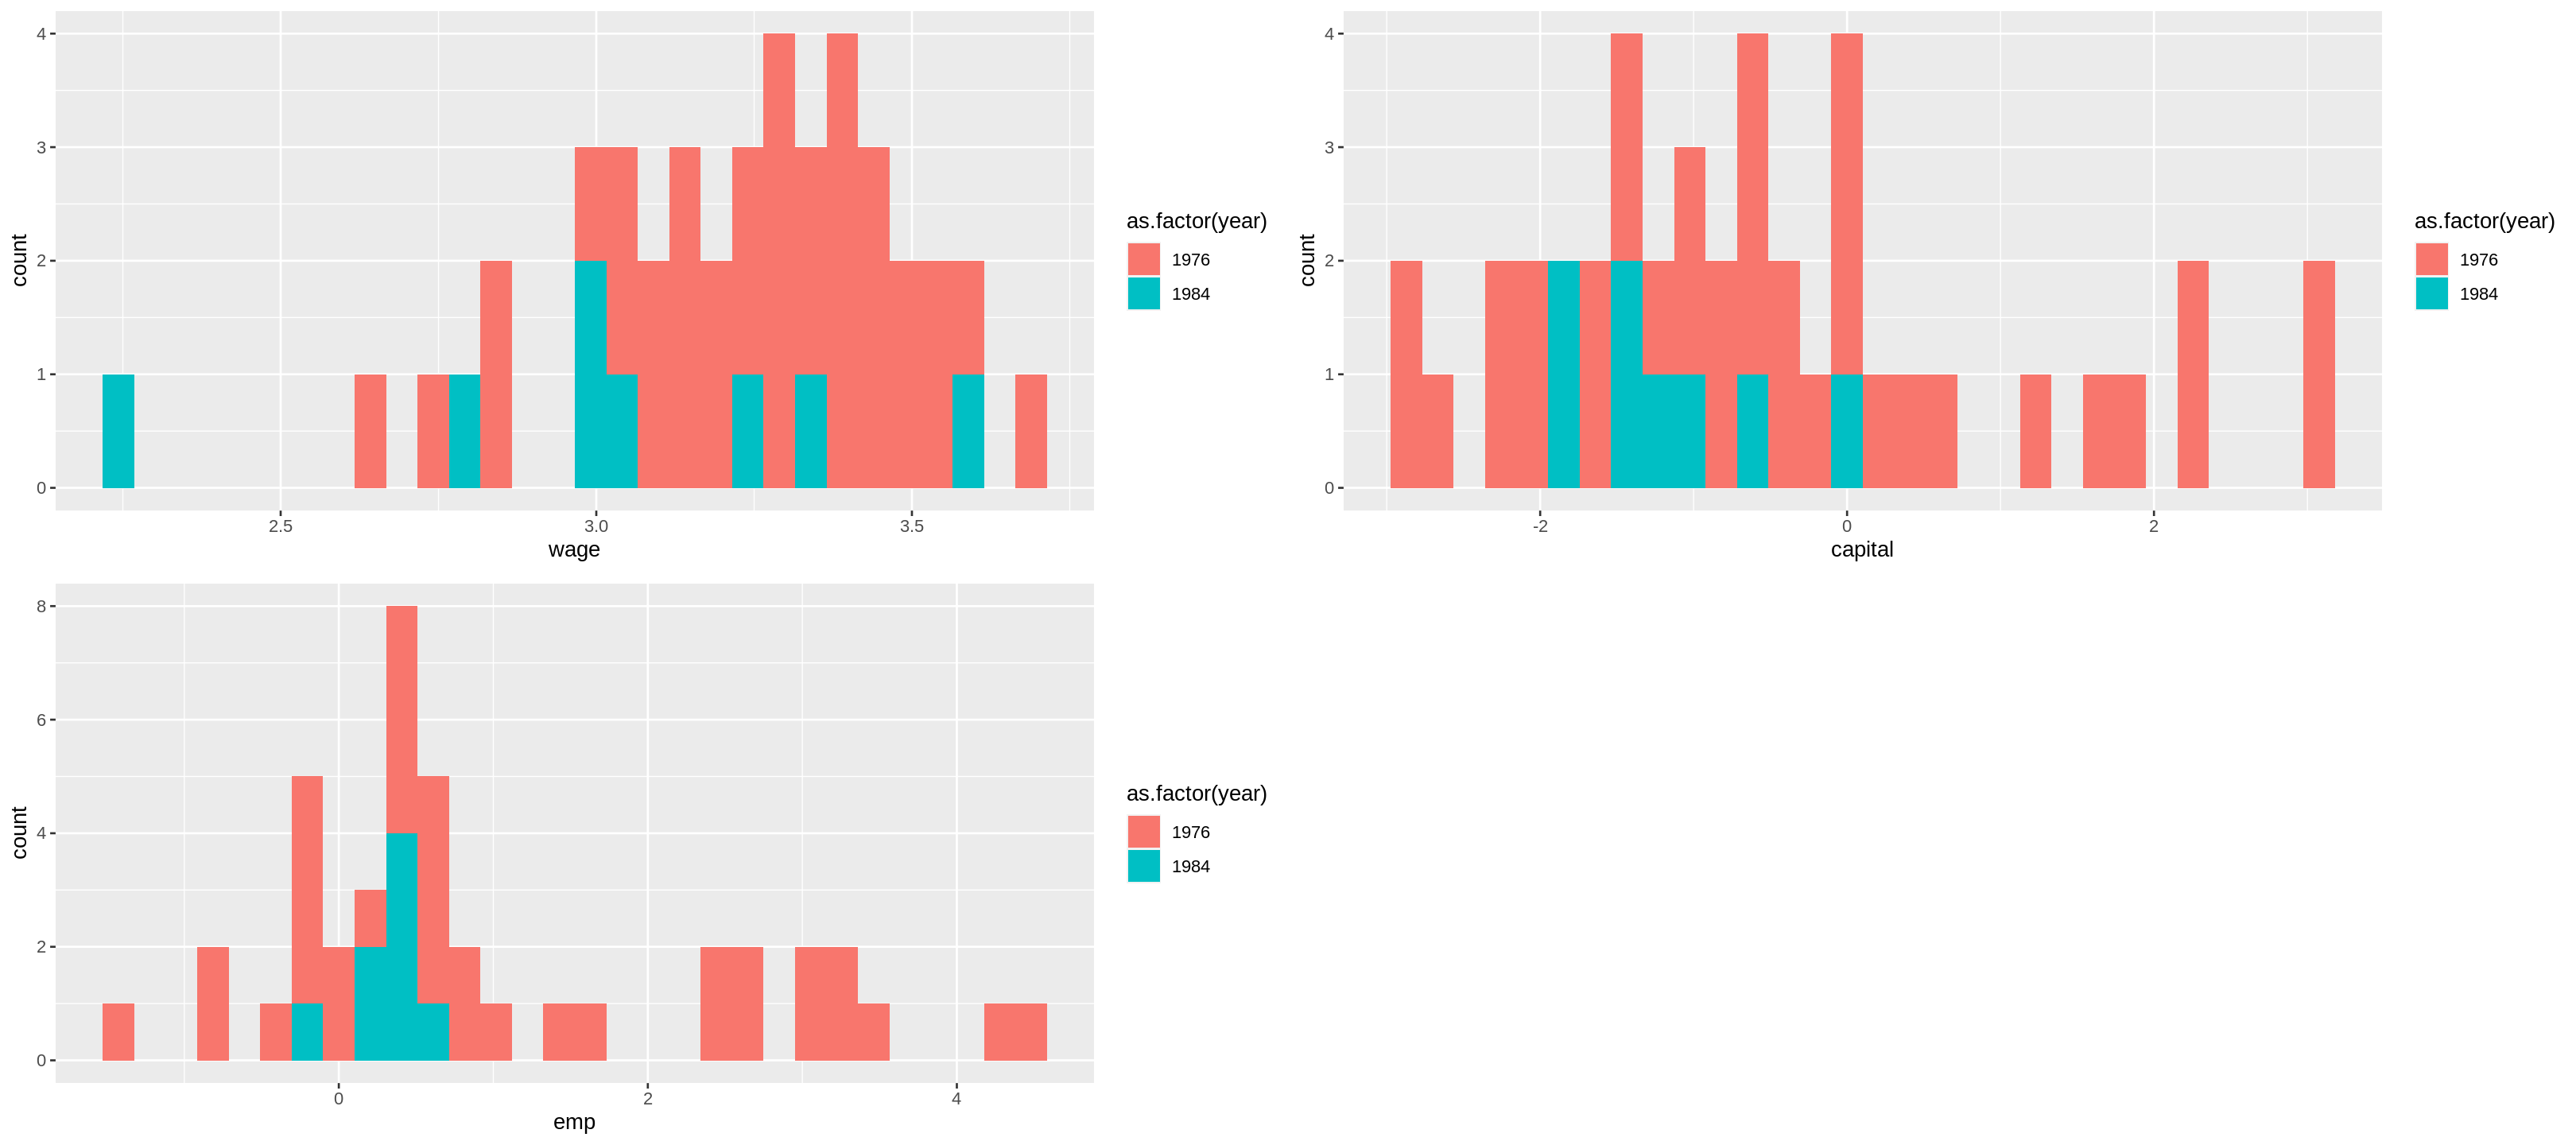

In [ ]:
a1 <- ggplot(df1, aes(x=wage)) + geom_histogram(aes(fill=as.factor(year)))
a2 <- ggplot(df1, aes(x=capital)) + geom_histogram(aes(fill=as.factor(year)))
a3 <- ggplot(df1, aes(x=emp)) + geom_histogram(aes(fill=as.factor(year)))
plot_grid(a1,a2,a3)

- Distribuciones asimétricas para todas las variables consideradas

<h3> (c) Construya una matriz scatter relacionando el empleo, los salarios reales y el capital. Mapee en
este gráfico el año. Se observa algún cambio en la relación?

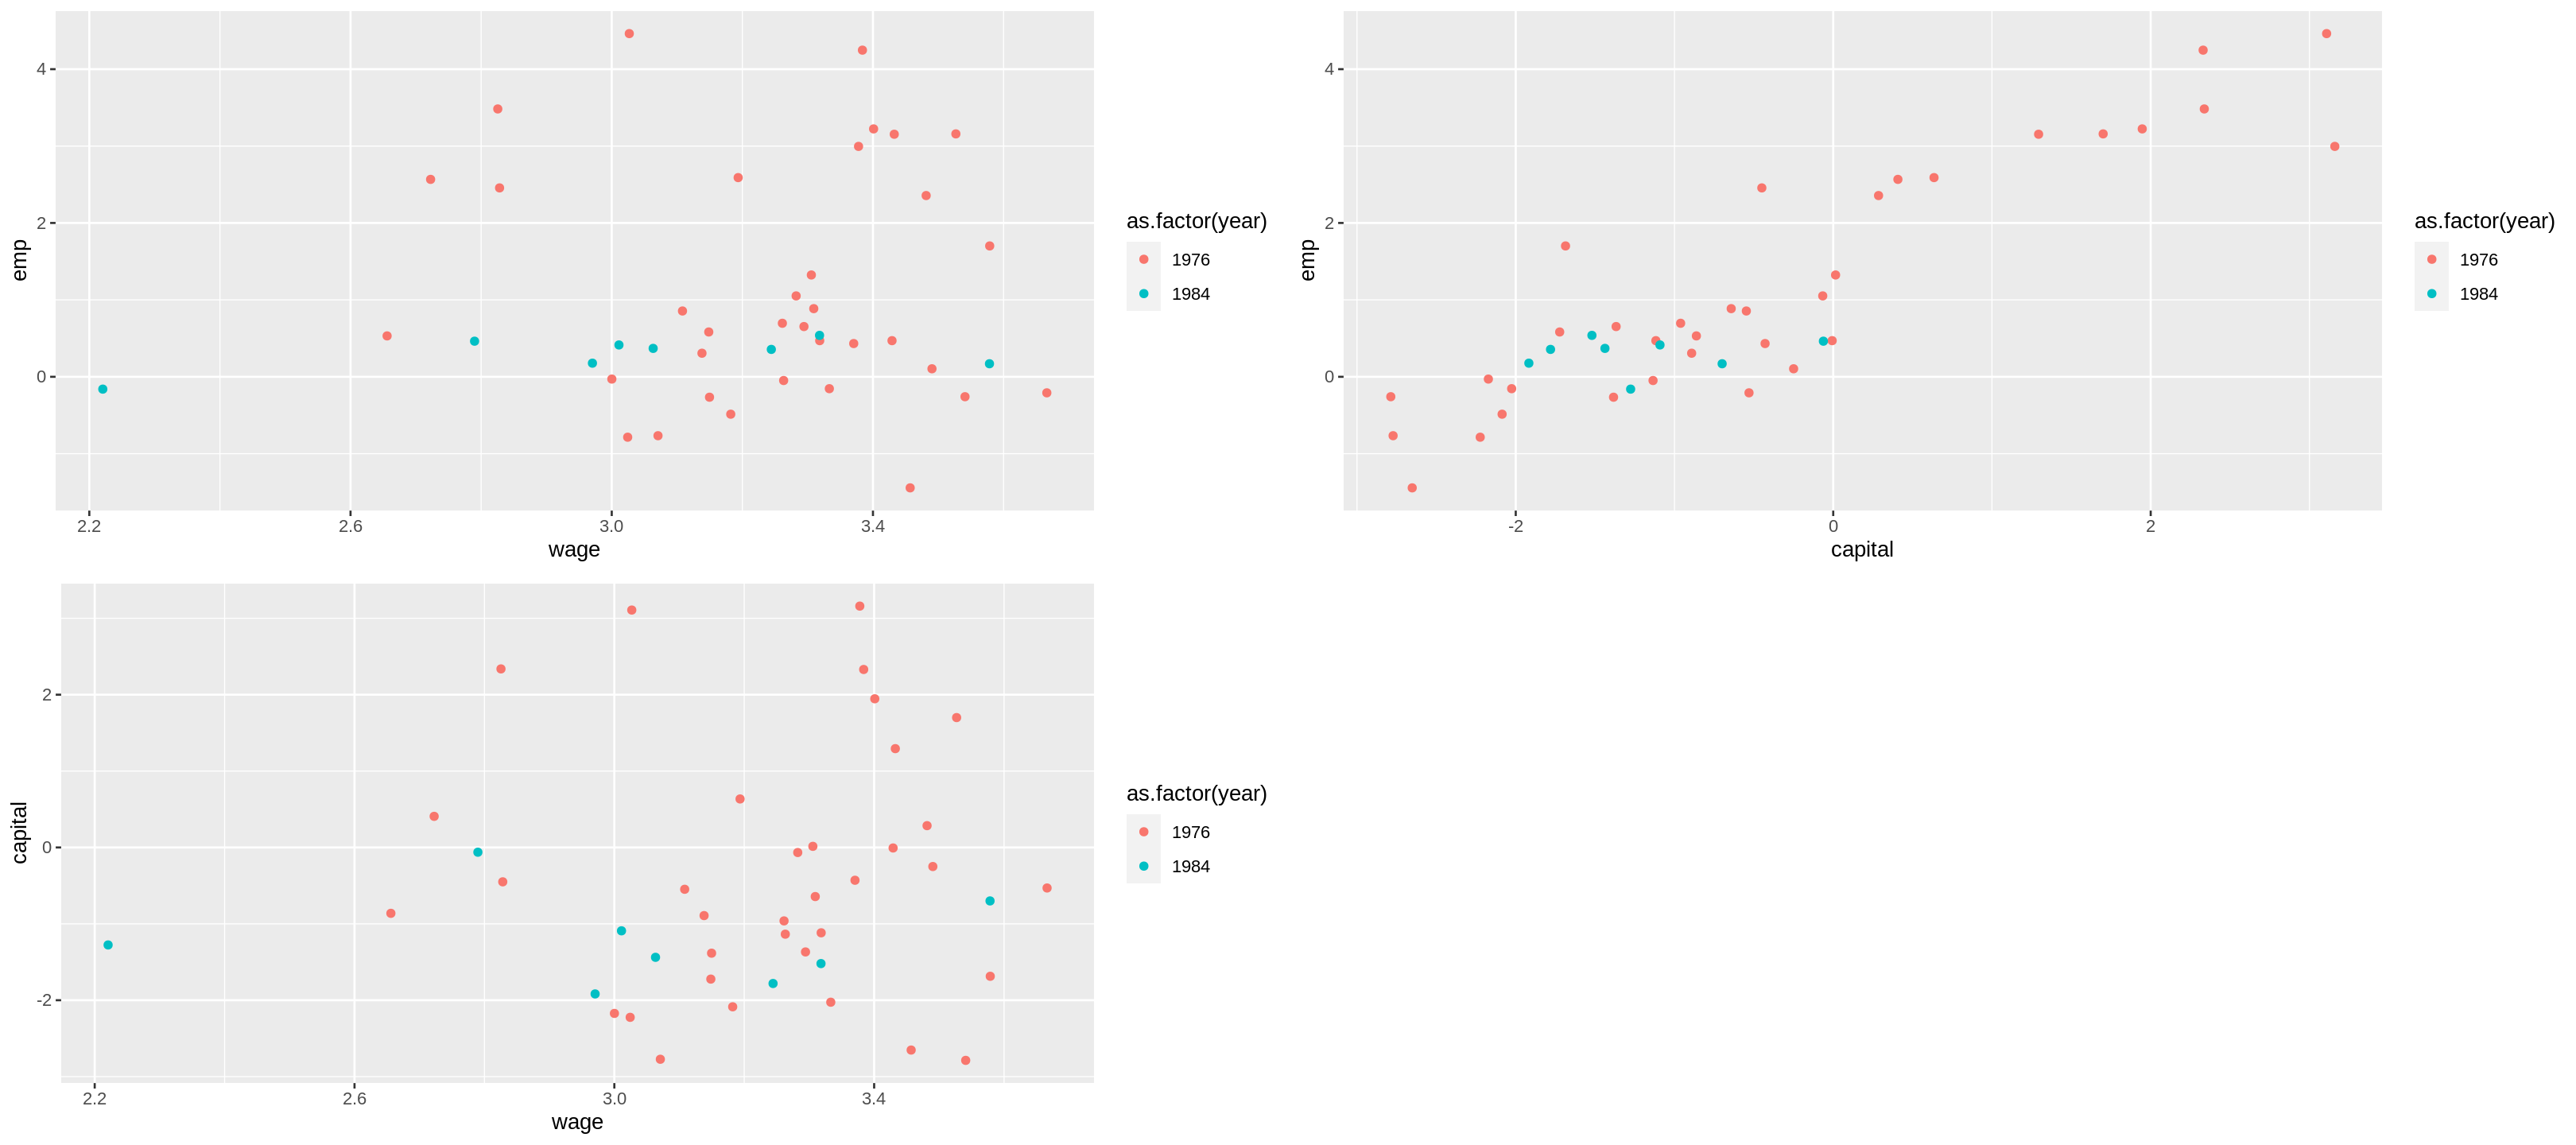

In [ ]:
a1 <- ggplot(df1, aes(wage, emp)) + geom_point(aes(color=as.factor(year)))
a2 <- ggplot(df1, aes(capital, emp)) + geom_point(aes(color=as.factor(year)))
a3 <- ggplot(df1, aes(wage, capital)) + geom_point(aes(color=as.factor(year)))
plot_grid(a1,a2,a3)

- Se observa correlación positiva para las variables empleo y capital. La variable salarios no parece estar correlacionada con las demás variables, segmentado por los años 1976 y 1984

<h3>(d) Reporte en un gráfico de lineas el promedio temporal de las variables analizadas, comente.


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



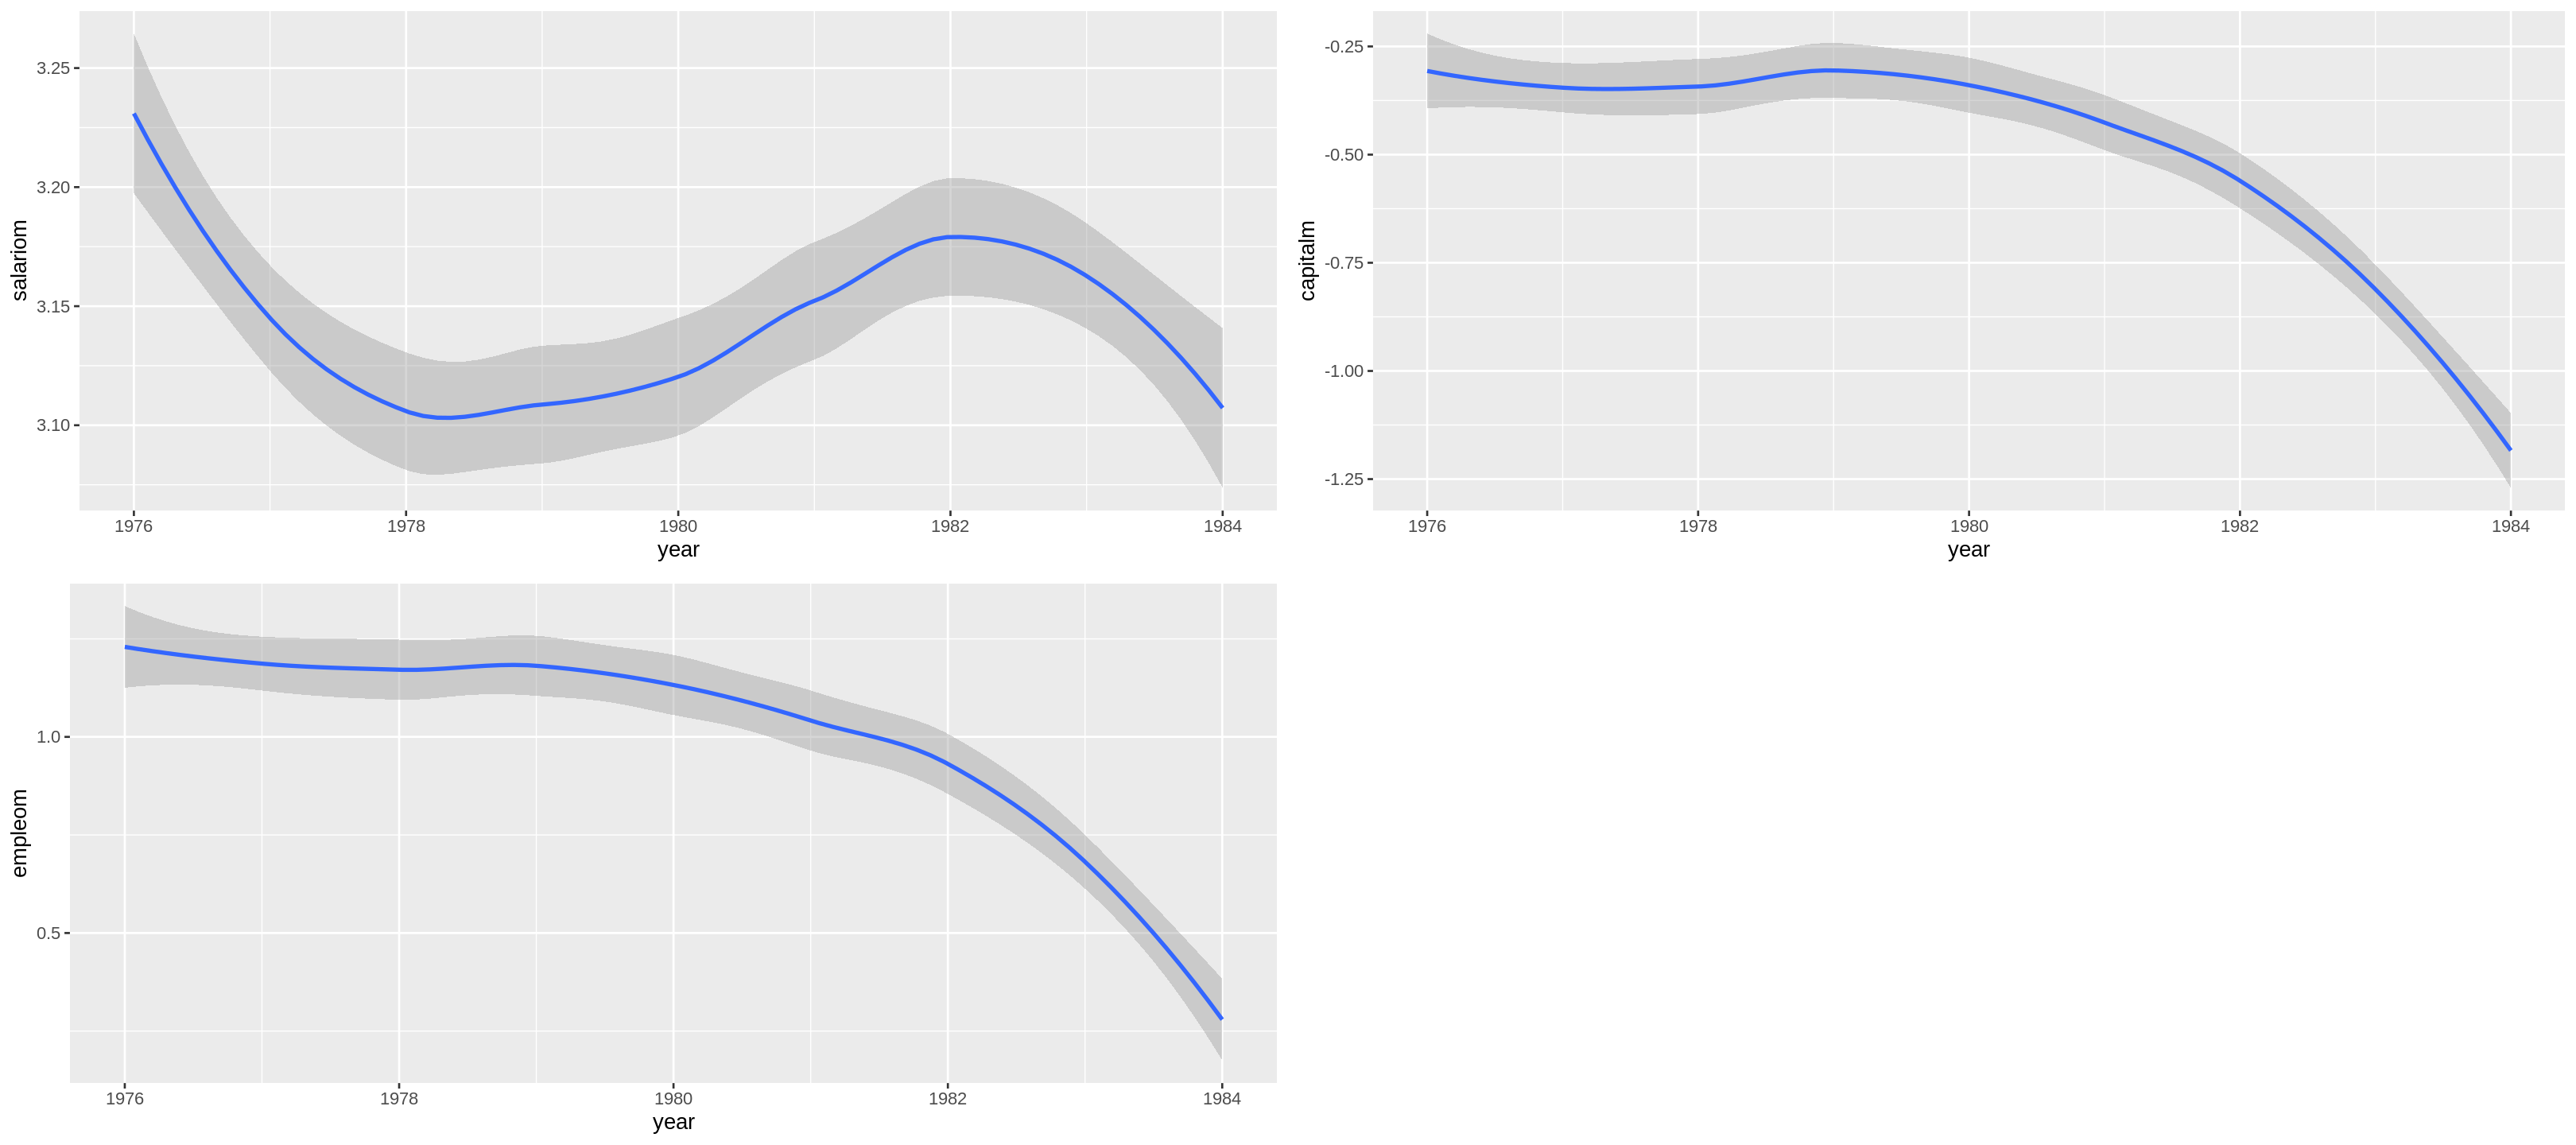

In [ ]:
temporal <- df %>% select(year, wage, capital, emp) %>% group_by(year) %>% 
summarise(salariom = mean(wage, na.rm = T),
                capitalm = mean(capital, na.rm = T),
                empleom = mean(emp, na.rm = T))

temporal %>% ggplot(aes(x=year,y=salariom)) + geom_smooth() -> g1
temporal %>% ggplot(aes(x=year,y=capitalm)) + geom_smooth() -> g2
temporal %>% ggplot(aes(x=year,y=empleom)) + geom_smooth() -> g3

plot_grid(g1,g2,g3)

- Se observa una tendencia general decreciente en todas en los promedios de salarios, empleo y capital, al pasar los años.

<h3> (e) Estamos interesados en identificar la elasticidad empleo-salarios.

In [ ]:
elas <- lm(emp ~ wage, data=df)
elas


Call:
lm(formula = emp ~ wage, data = df)

Coefficients:
(Intercept)         wage  
    1.28143     -0.07172  


## **Ejercicio 3**

<h3> Cornwell y Trumbull (1994) estimaron un un modelo de crimen utilizando datos de panel en 90 municipios en Carolina del Norte durante el periodo 1981-1987. Los autores estaban interesadosen identificar el efecto causal que tenia la probabilidad de arresto, la probabilidad de que el individuo sea convicto dado que fue arrestado y la probabilidad de que ocurra una sentencia de prisión dado que el individuo es convicto. La data para este ejercicio es la de CRIME4 de wooldridge:

`data(crime4, package = "wooldridge")`, 

<h3> la etiqueta de las variables están en:

http://fmwww.bc.edu/ecp/data/wooldridge/crime4.des.


In [ ]:
library(wooldridge)

In [ ]:
data(crime4, package = "wooldridge")
crime <- as_tibble(crime4)

<h3> (a) Calcule las estadísticas descriptivas.

In [ ]:
crime %>% select(prbarr, prbconv, prbpris) %>% summary() 

crime %>% select(county, year, prbarr, prbconv, prbpris) %>%
      group_by(year) %>% 
                    summarise(Prob_arresto_media = mean(prbarr, na.rm = T),
                              Prob_convicto_media = mean(prbconv, na.rm = T),
                              Prob_prision_media = mean(prbpris, na.rm = T))                        
          

     prbarr           prbconv            prbpris      
 Min.   :0.05882   Min.   : 0.06838   Min.   :0.1489  
 1st Qu.:0.21790   1st Qu.: 0.34769   1st Qu.:0.3744  
 Median :0.27824   Median : 0.47437   Median :0.4286  
 Mean   :0.30737   Mean   : 0.68862   Mean   :0.4255  
 3rd Qu.:0.35252   3rd Qu.: 0.63560   3rd Qu.:0.4832  
 Max.   :2.75000   Max.   :37.00000   Max.   :0.6786  

year,Prob_arresto_media,Prob_convicto_media,Prob_prision_media
<int>,<dbl>,<dbl>,<dbl>
81,0.2990574,0.7362951,0.4341533
82,0.3115709,0.5486328,0.4343104
83,0.3281419,0.6048943,0.4191138
84,0.3178034,0.6123345,0.4445089
85,0.3040093,1.1218061,0.4307841
86,0.2957571,0.6454996,0.4051325
87,0.2952375,0.5508611,0.4106256


- Analizando las estadísticas descriptivas, vemos que la probabilidad de arresto se ha mantenido alrededor del 30% a través de los años, la probabilidad de ser convicto dado que ocurrió un arresto ha ido decreciendo al pasar los años, mientras que la probabilidad de que ocurra una sentencia dado que es convicto se ha mantenido alrededor de 42%.

Cabe destacar que la data muestra inconsistencias dado que las variables prbarr y prbconv cuentan con probabilidades mayores a 1 lo cual no tiene sentido

In [ ]:
counties_error <- crime %>% select(county, year, prbarr, prbconv, prbpris) %>% filter(prbconv > 1 | prbarr > 1) %>% distinct(county)
counties_error$county

crime %>% filter(!county %in% counties_error$county) %>% select(county, year, prbarr, prbconv, prbpris) %>%
      group_by(year) %>% 
                    summarise(Prob_arresto_media = mean(prbarr, na.rm = T),
                              Prob_convicto_media = mean(prbconv, na.rm = T),
                              Prob_prision_media = mean(prbpris, na.rm = T))

crime <- crime %>% filter(!county %in% counties_error$county)

[1]   3  19  33  39  53  59  69  79  99 115 117 127 137 141 149 163 169 171 173
[20] 175 185 187 195 197

year,Prob_arresto_media,Prob_convicto_media,Prob_prision_media
<int>,<dbl>,<dbl>,<dbl>
81,0.2981785,0.4237930,0.4428594
82,0.3073350,0.4219600,0.4406196
83,0.2971330,0.4476965,0.4331778
84,0.3104924,0.4367552,0.4412278
85,0.3141074,0.4315149,0.4421155
86,0.2980434,0.4376408,0.4171024
87,0.2925893,0.4242272,0.4178888


Al excluir los municipios con errores en sus probabilidades, vemos como cambian los estadísticos. Para fines académicos, procederemos con la data de `90 - 24 = 66` municipios

<h3> (b) Analice la distribución de las tasas de crimen, de arrestos, de ser convicto y sufrir una sentencia, utilizando un histograma.

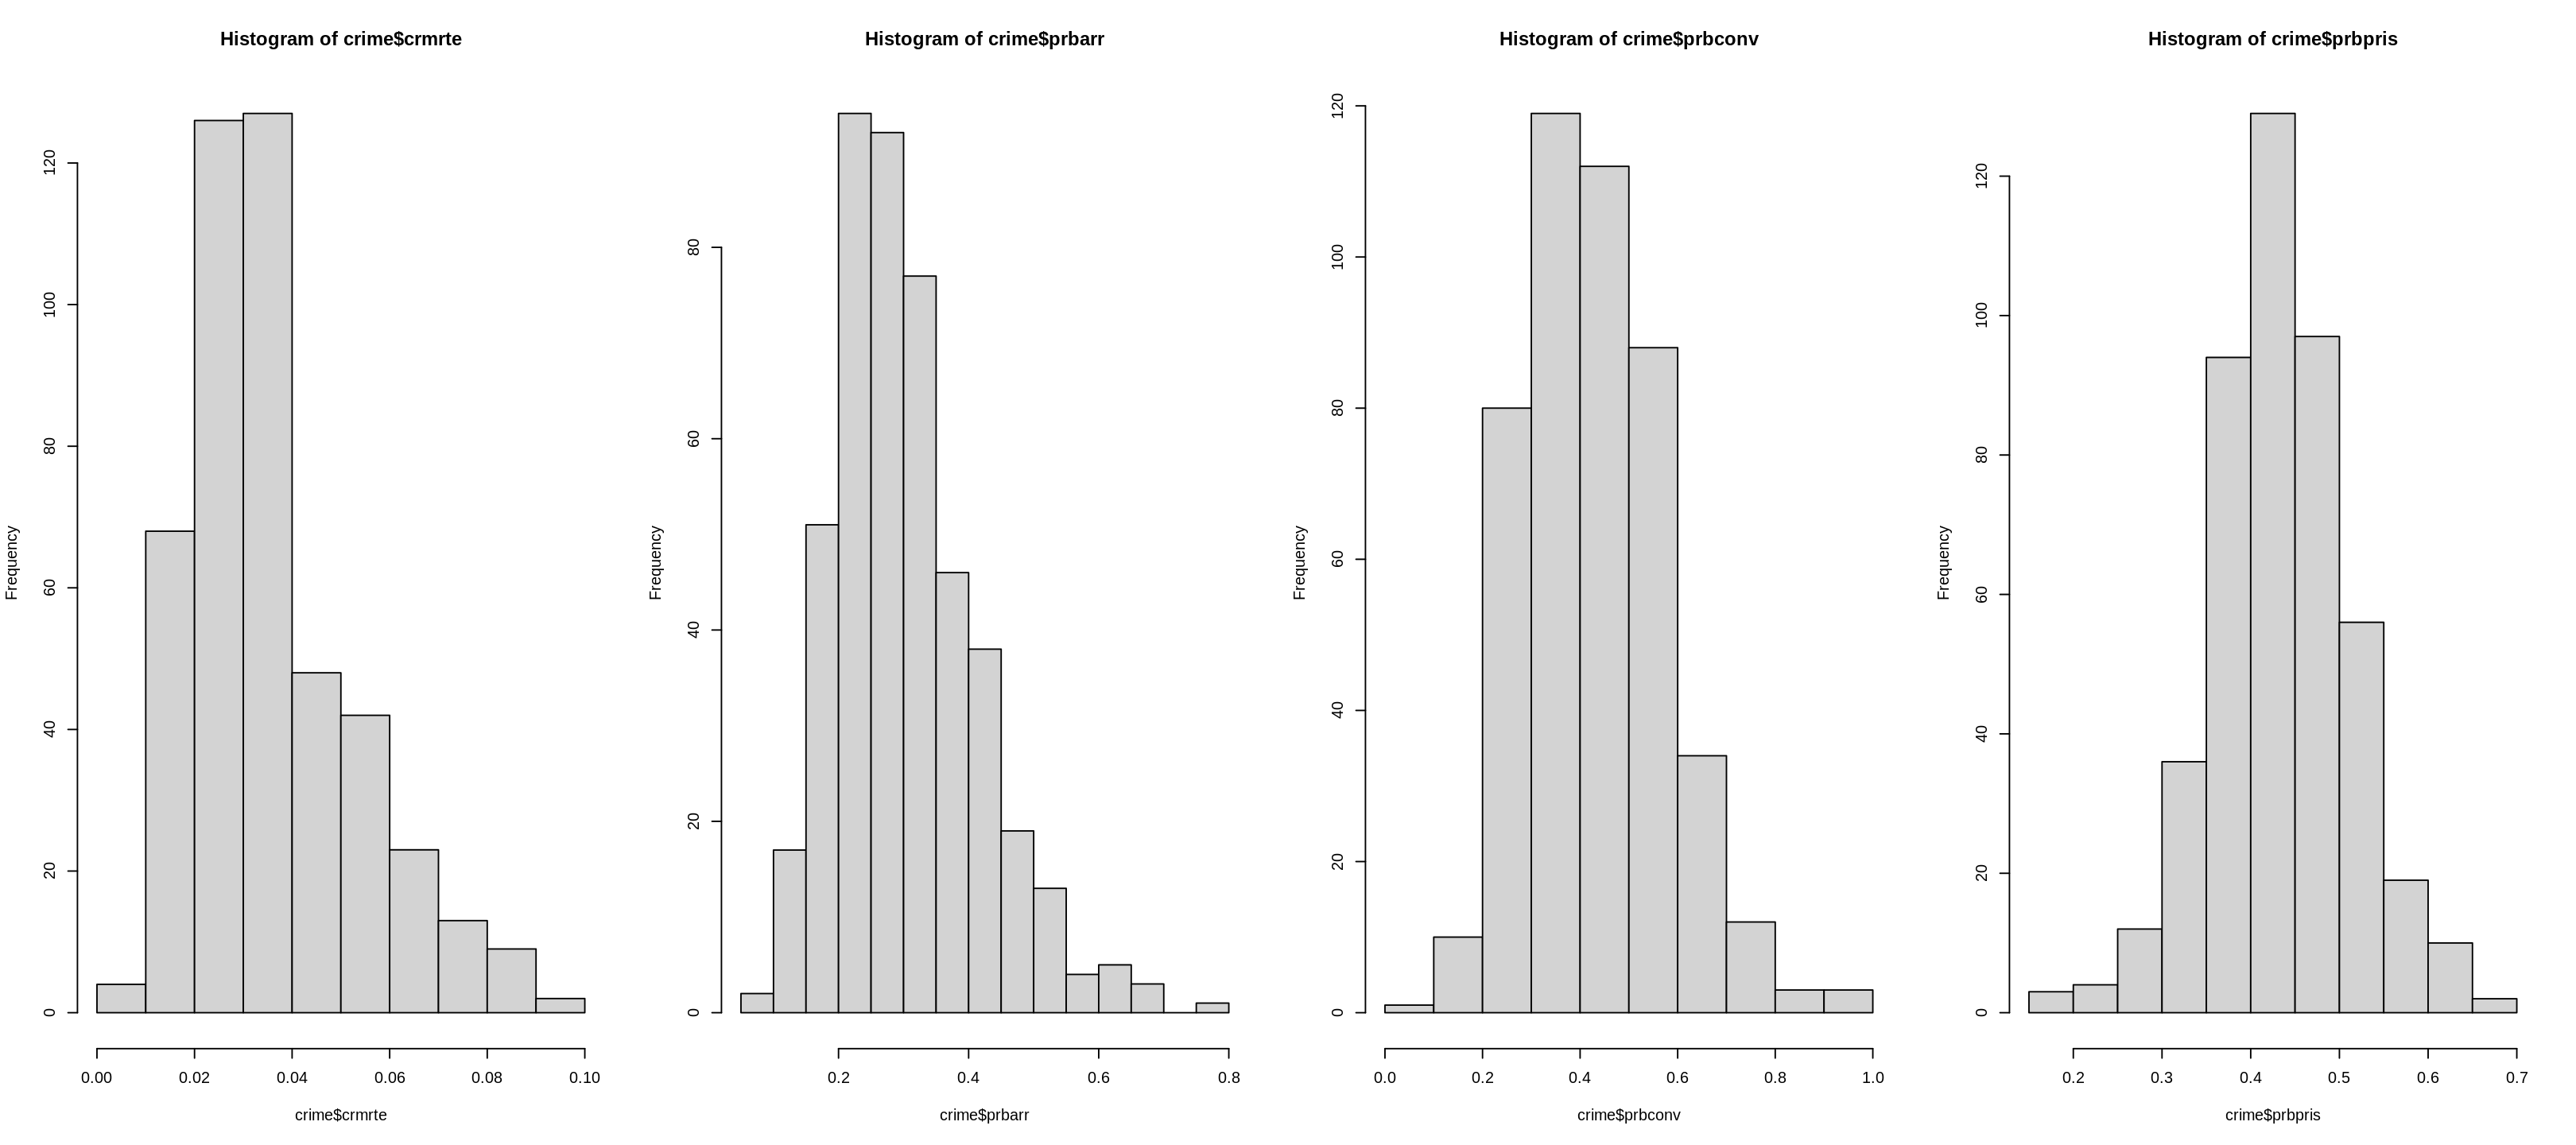

In [ ]:
options(repr.plot.width=18, repr.plot.height=8, repr.plot.res = 180)
par(mfrow=c(1,4))
hist(crime$crmrte)
hist(crime$prbarr)
hist(crime$prbconv)
hist(crime$prbpris)

- A partir de los histogramas vemos que la tasas de crimen, de arrestos y de ser convicto poseen una distribución ligeramente asimétrica, pero aun podemos asumir una distribución aproximadamente normal para todas las tasas.


<h3>(c) Analice la correlación entre estas tasas mediante un diagrama de dispersión. En dicho diagrama, mapee el municipio. Interprete.

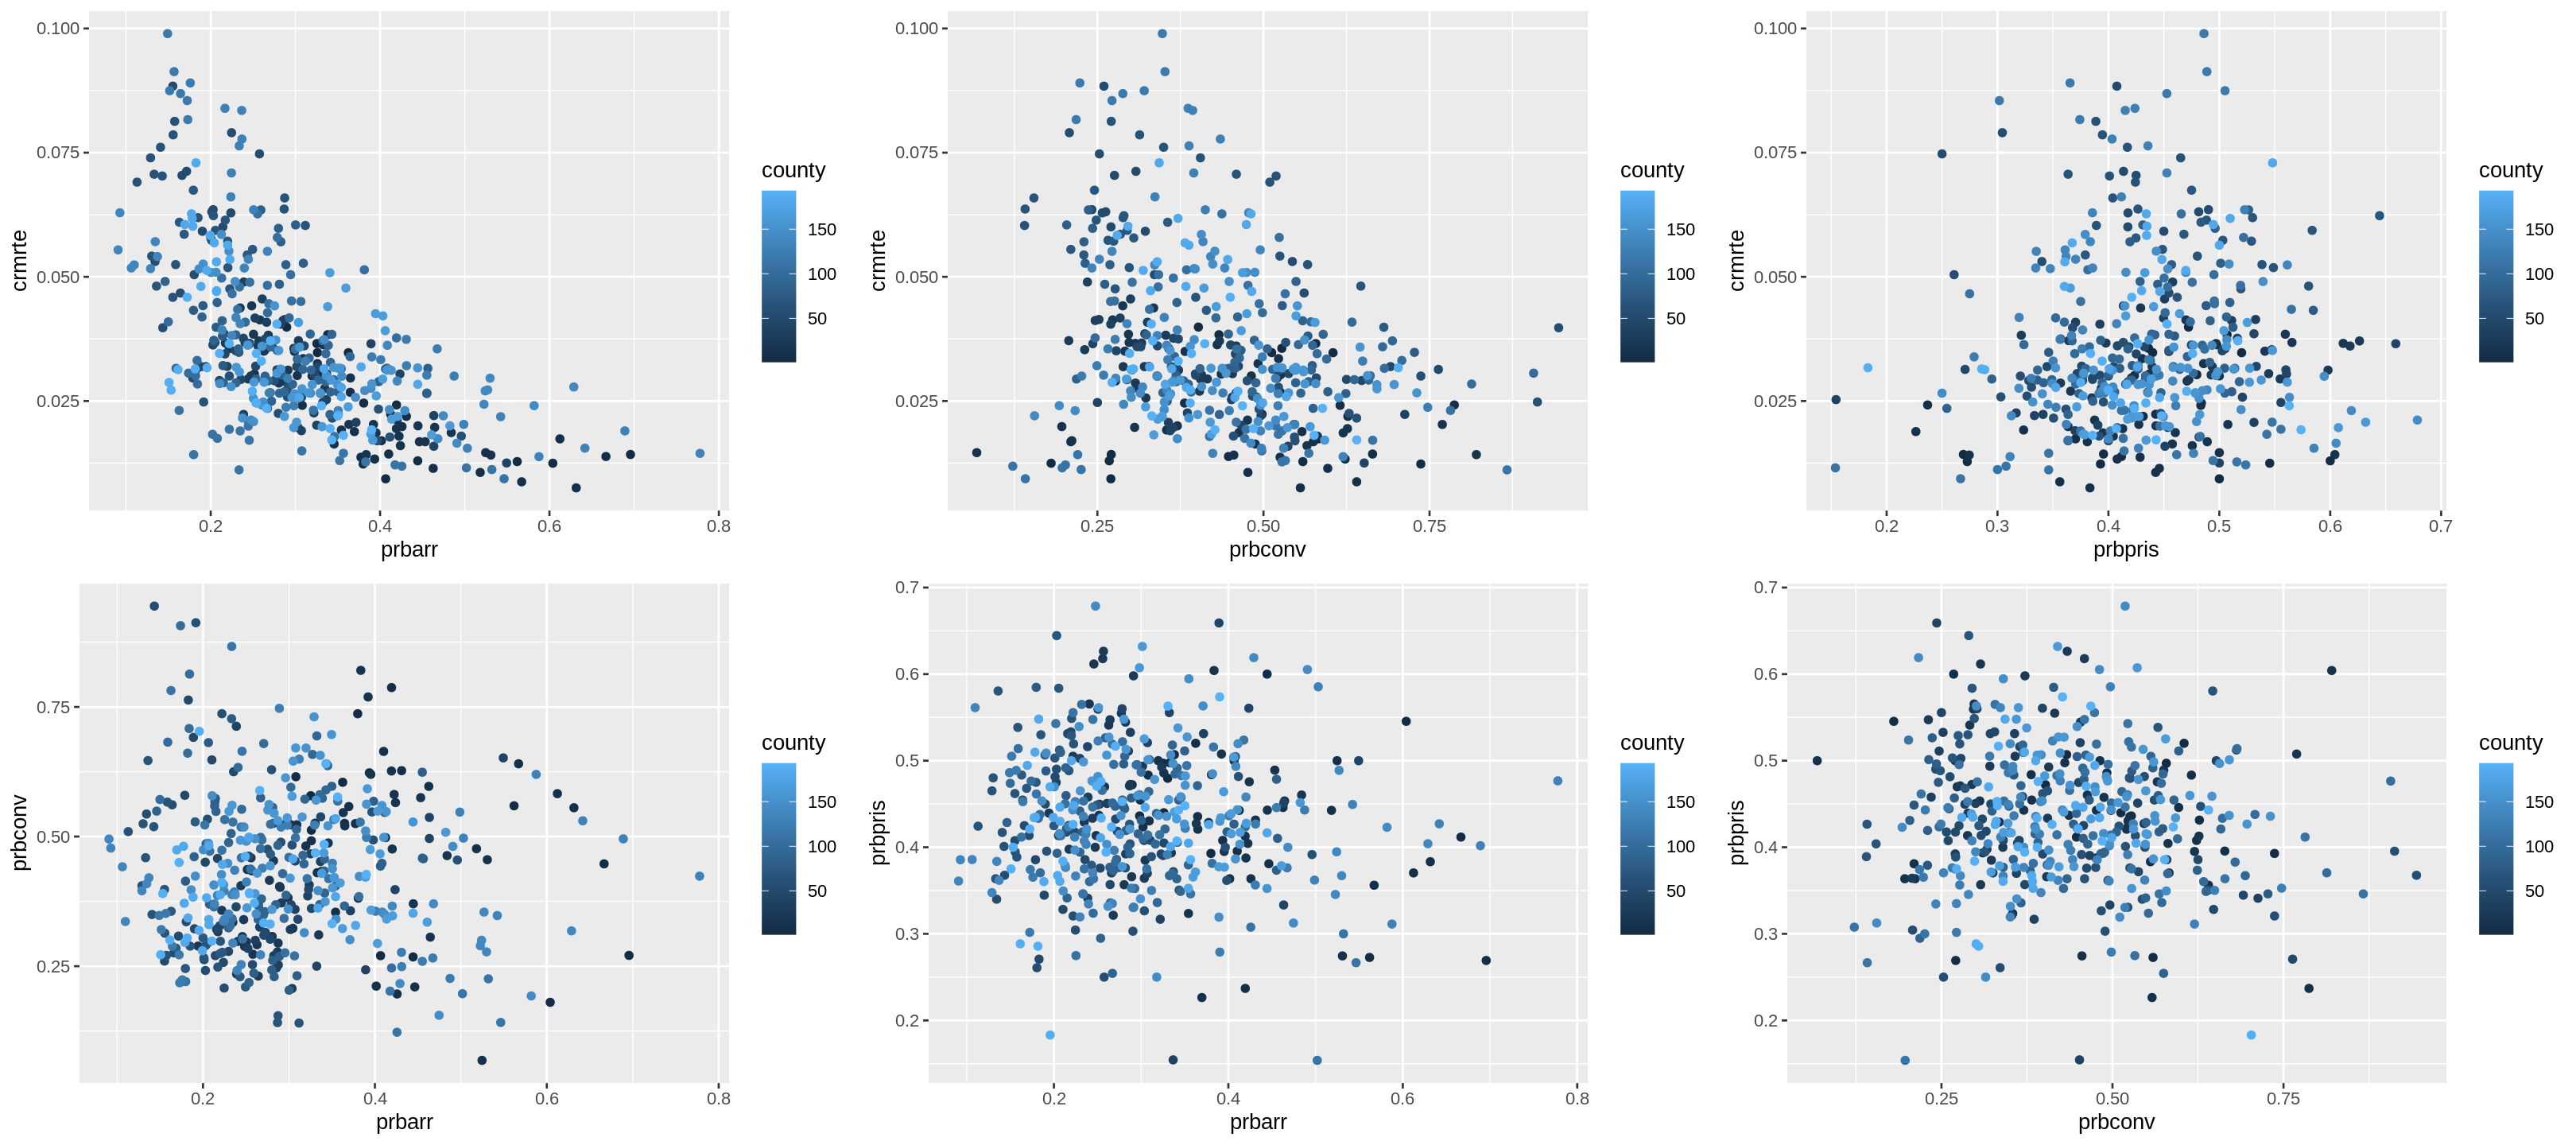

In [ ]:
options(repr.plot.width=18, repr.plot.height=8, repr.plot.res = 180)

crime %>% select(county, crmrte, year, prbarr, prbconv, prbpris) %>%
      ggplot(aes(prbarr, crmrte)) + geom_point(aes(color=county)) -> g1

crime %>% select(county, crmrte, year, prbarr, prbconv, prbpris) %>%
      ggplot(aes(prbconv, crmrte)) + geom_point(aes(color=county)) -> g2

crime %>% select(county, crmrte, year, prbarr, prbconv, prbpris) %>%
      ggplot(aes(prbpris, crmrte)) + geom_point(aes(color=county)) -> g3

crime %>% select(county, crmrte, year, prbarr, prbconv, prbpris) %>%
      ggplot(aes(prbarr, prbconv)) + geom_point(aes(color=county)) -> g4

crime %>% select(county, crmrte, year, prbarr, prbconv, prbpris) %>%
      ggplot(aes(prbarr, prbpris)) + geom_point(aes(color=county)) -> g5

crime %>% select(county, crmrte, year, prbarr, prbconv, prbpris) %>%
      ggplot(aes(prbconv, prbpris)) + geom_point(aes(color=county)) -> g6

plot_grid(g1,g2,g3,g4,g5,g6)

- A partir de los gráficos se observa que a mayor probabilidad de arresto, menor tasa de crimen lo cual parece contraintuitivo que existe una correlación negativa entre estas variables

- Para las demás variables la correlaciones parecen ser insignificantes al no poder identificar un patron lineal entre ellas.

<h3> (d) Realice la estimación Pooled, Random, FE. Interprete y Compare los resultados.

In [ ]:
#Pooled ols
pooled <- plm(lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + polpc + ldensity + lwcon + wtuc + lwtrd + lwfir + lwser + lwmfg + lwfed + lwsta + lwloc + lpctymle + lpctmin + urban + central, data=crime,
              index = c("county", "year"), model='pooling') 

# Random effects
re <- plm(lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + polpc + ldensity + lwcon + wtuc + lwtrd + lwfir + lwser + lwmfg + lwfed + lwsta + lwloc + lpctymle + lpctmin + urban + central, data=crime,
              index = c("county", "year"), model='random')

# Fixed effects
fe <- plm(lcrmrte ~ lprbarr + lprbconv + lprbpris + lavgsen + polpc + ldensity + lwcon + wtuc + lwtrd + lwfir + lwser + lwmfg + lwfed + lwsta + lwloc + lpctymle + lpctmin + urban + central, data=crime,
              index = c("county", "year"), model='within')

rob_se <- list(sqrt(diag(vcovHC(pooled, type = "sss", cluster = "group"))), 
               sqrt(diag(vcovHC(re, type = "sss", cluster = "group"))), 
               sqrt(diag(vcovHC(fe, type = "sss", cluster = "group"))))

`stargazer(pooled, re, fe, type="html", header= F, font.size = "small", single.row = F, omit.stat = c("res.dev","f","ser"), title= "Comparación de modelos POOLED vs RE vs FE",
column.labels = c("POLS", "RE", "FE"))`

<table style="text-align:center"><caption><strong>Comparación de modelos POOLED vs RE vs FE</strong></caption>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="3"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="3" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="3">lcrmrte</td></tr>
<tr><td style="text-align:left"></td><td>POLS</td><td>RE</td><td>FE</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">lprbarr</td><td>-0.496<sup>***</sup></td><td>-0.420<sup>***</sup></td><td>-0.376<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.032)</td><td>(0.034)</td><td>(0.037)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lprbconv</td><td>-0.237<sup>***</sup></td><td>-0.228<sup>***</sup></td><td>-0.219<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.028)</td><td>(0.024)</td><td>(0.024)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lprbpris</td><td>-0.171<sup>***</sup></td><td>-0.164<sup>***</sup></td><td>-0.143<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.048)</td><td>(0.034)</td><td>(0.034)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lavgsen</td><td>0.040</td><td>0.079<sup>***</sup></td><td>0.094<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.036)</td><td>(0.026)</td><td>(0.026)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">polpc</td><td>276.306<sup>***</sup></td><td>169.666<sup>***</sup></td><td>76.397<sup>*</sup></td></tr>
<tr><td style="text-align:left"></td><td>(21.691)</td><td>(32.413)</td><td>(41.526)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">ldensity</td><td>0.272<sup>***</sup></td><td>0.347<sup>***</sup></td><td>0.769<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.023)</td><td>(0.045)</td><td>(0.273)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwcon</td><td>0.012</td><td>-0.031</td><td>-0.031</td></tr>
<tr><td style="text-align:left"></td><td>(0.050)</td><td>(0.039)</td><td>(0.039)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">wtuc</td><td>-0.0001<sup>*</sup></td><td>-0.00002</td><td>-0.00000</td></tr>
<tr><td style="text-align:left"></td><td>(0.00003)</td><td>(0.00002)</td><td>(0.00002)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwtrd</td><td>-0.072</td><td>-0.050</td><td>-0.036</td></tr>
<tr><td style="text-align:left"></td><td>(0.047)</td><td>(0.033)</td><td>(0.032)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwfir</td><td>-0.062</td><td>-0.052</td><td>-0.032</td></tr>
<tr><td style="text-align:left"></td><td>(0.059)</td><td>(0.046)</td><td>(0.046)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwser</td><td>-0.038</td><td>0.00005</td><td>0.009</td></tr>
<tr><td style="text-align:left"></td><td>(0.030)</td><td>(0.021)</td><td>(0.021)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwmfg</td><td>0.057</td><td>-0.030</td><td>-0.235<sup>*</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.064)</td><td>(0.097)</td><td>(0.124)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwfed</td><td>-0.016</td><td>-0.427<sup>***</sup></td><td>-0.525<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.102)</td><td>(0.137)</td><td>(0.159)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwsta</td><td>-0.311<sup>***</sup></td><td>-0.062</td><td>0.093</td></tr>
<tr><td style="text-align:left"></td><td>(0.069)</td><td>(0.078)</td><td>(0.090)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwloc</td><td>0.278<sup>**</sup></td><td>0.328<sup>***</sup></td><td>0.482<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.108)</td><td>(0.102)</td><td>(0.114)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lpctymle</td><td>-0.059</td><td>-0.028</td><td>0.527<sup>*</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.051)</td><td>(0.102)</td><td>(0.301)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">lpctmin</td><td>0.224<sup>***</sup></td><td>0.228<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(0.010)</td><td>(0.022)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">urban</td><td>-0.100<sup>**</sup></td><td>-0.112</td><td></td></tr>
<tr><td style="text-align:left"></td><td>(0.041)</td><td>(0.088)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">central</td><td>-0.112<sup>***</sup></td><td>-0.083<sup>*</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(0.021)</td><td>(0.048)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td style="text-align:left">Constant</td><td>-4.843<sup>***</sup></td><td>-3.494<sup>***</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(0.453)</td><td>(0.460)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td><td></td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Observations</td><td>462</td><td>462</td><td>462</td></tr>
<tr><td style="text-align:left">R<sup>2</sup></td><td>0.859</td><td>0.586</td><td>0.367</td></tr>
<tr><td style="text-align:left">Adjusted R<sup>2</sup></td><td>0.853</td><td>0.568</td><td>0.232</td></tr>
<tr><td colspan="4" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"><em>Note:</em></td><td colspan="3" style="text-align:right"><sup>*</sup>p<0.1; <sup>**</sup>p<0.05; <sup>***</sup>p<0.01</td></tr>
</table>

Observamos como los modelos ofrecen resultados similares, implicando que, controlando por los factores del vector B, los incrementos en las probabilidades de arrestos, convicto, y de sentencia de prision tienen efectos negativos en la tasa de criminalidad. Vemos además como el R2 disminuye significativamente al utilizar el estimador de efectos aleatorios y aun más para efectos fijos

<h3> (e) Podría pensarse que la tasa de arrestos (lprbarr) es endógena, podría argumentar al respecto.

- Podríamos pensar que la tasa de arrestos es endógena si se cumple la condición de que esta variable esté correlacionada con el error

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



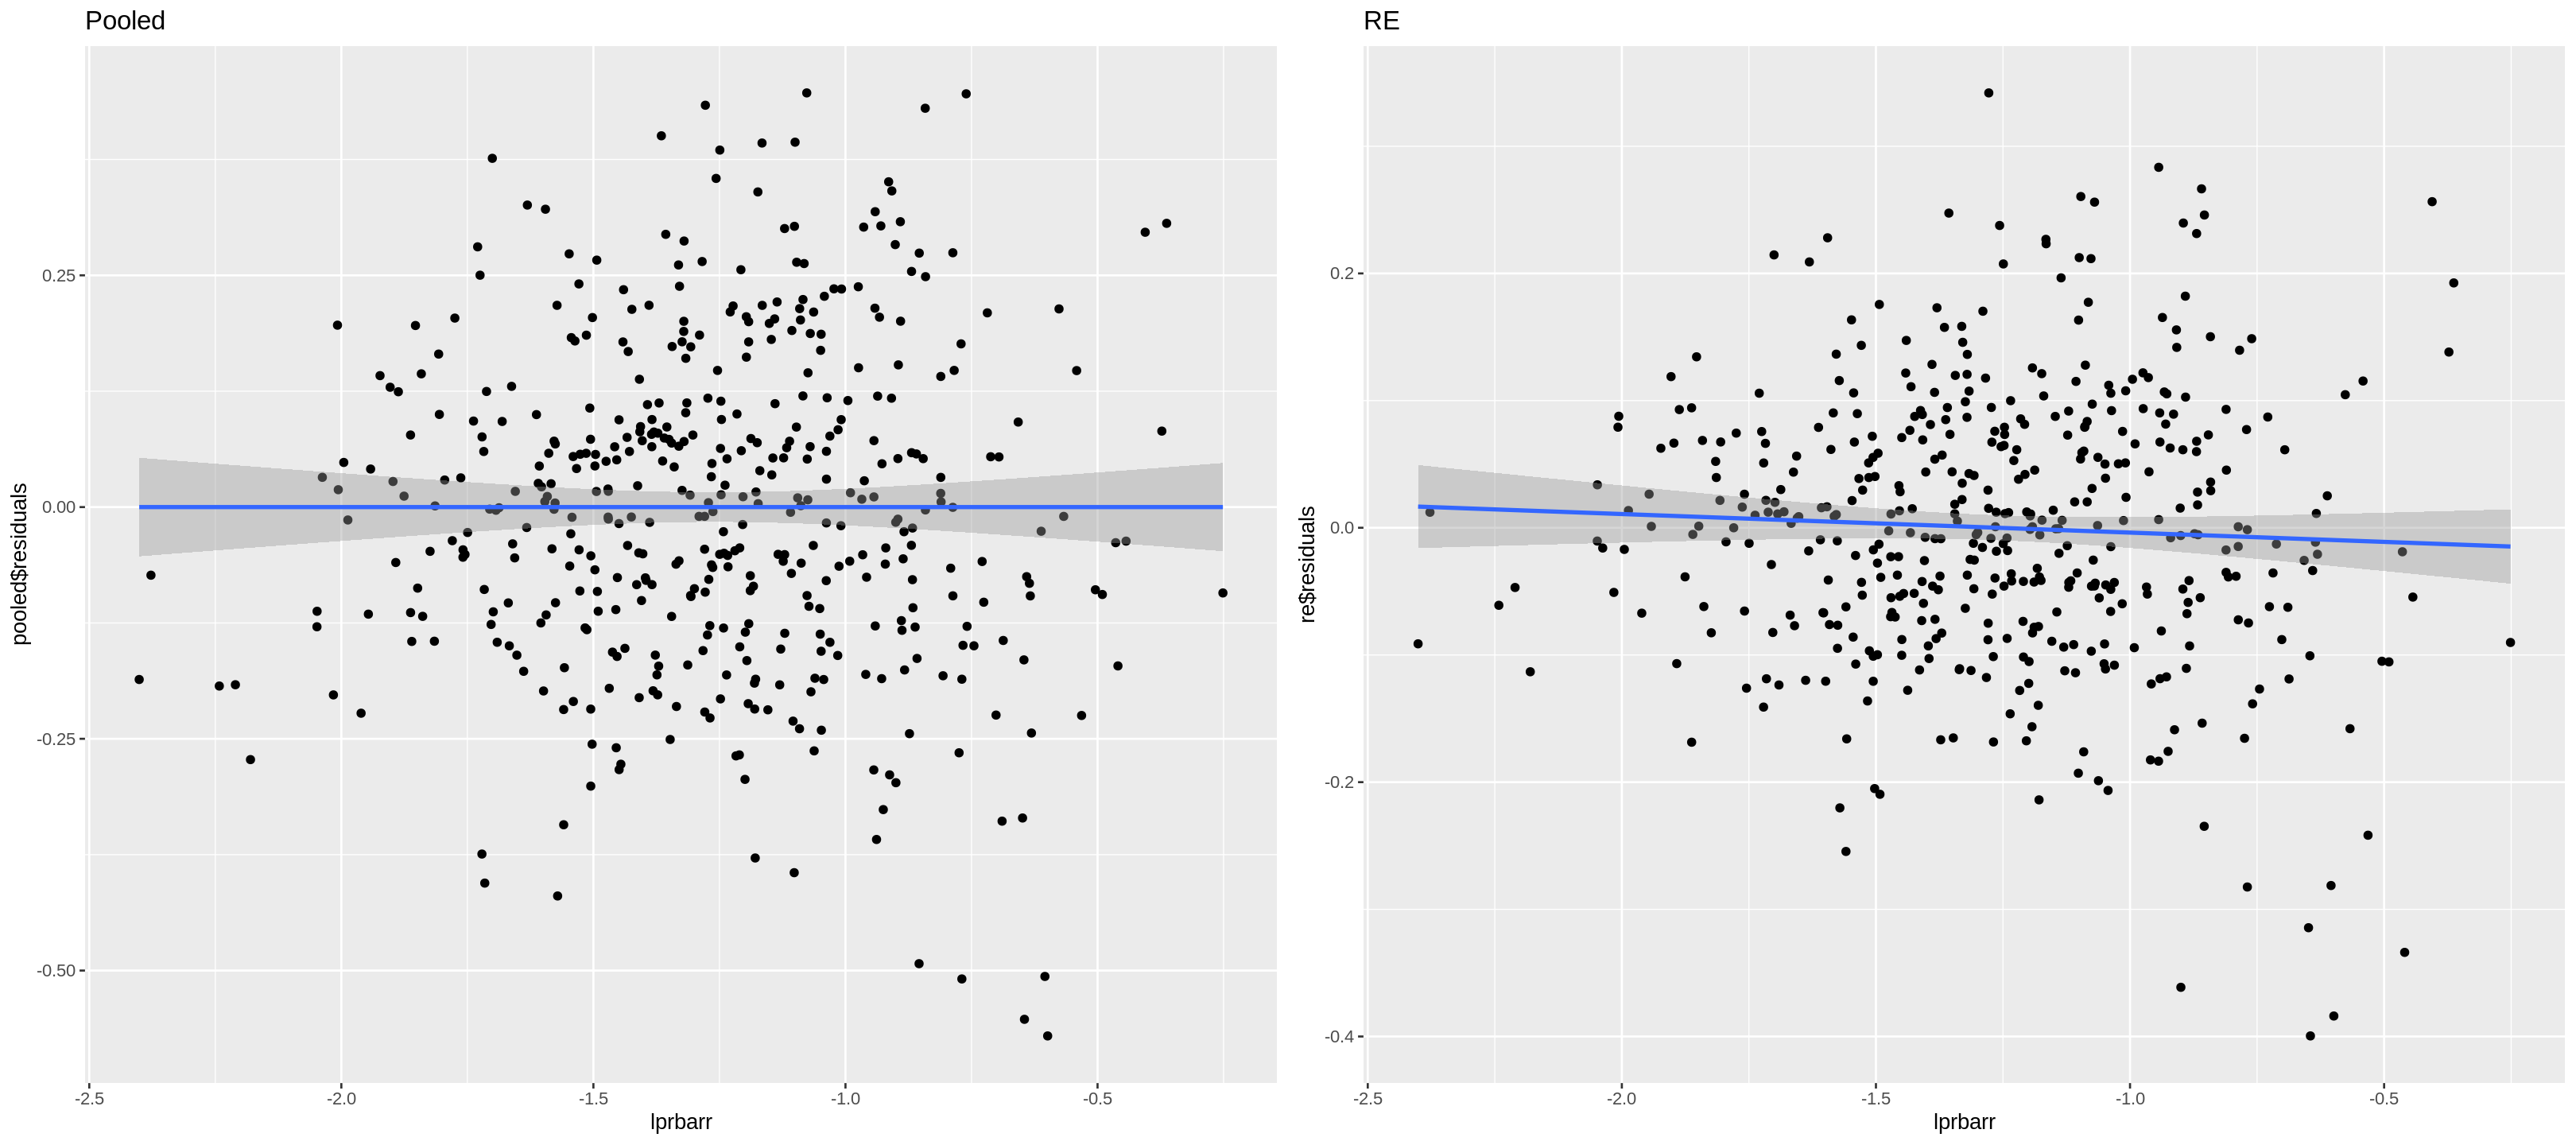

In [ ]:
crime %>% ggplot(aes(lprbarr, pooled$residuals)) + geom_point() + geom_smooth(method=lm) + ggtitle("Pooled") -> p1
crime %>% ggplot(aes(lprbarr, re$residuals)) + geom_point() + geom_smooth(method=lm) + ggtitle("RE") -> p2
plot_grid(p1,p2)

- Al ver que no existe ningún patrón entre los residuos y la variable lprbarr, por lo que su correlación  es lo suficientemente pequeña para descartar el problema de endogeneidad. No obstante, de forma intuitiva es válido pensar que esta variable debe ser endógena porque al aumentar la cantidad de crímenes debería aumentar la cantidad de arrestos.

<h3>(f) Cornwell y Trumbull (1994) proponen como instrumentos lmix y ltaxpc para la tasa de arrestos.
Podría argumentar por qué estas variables califican como instrumentos validos. ¿Cuál es el argumento de los autores?.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



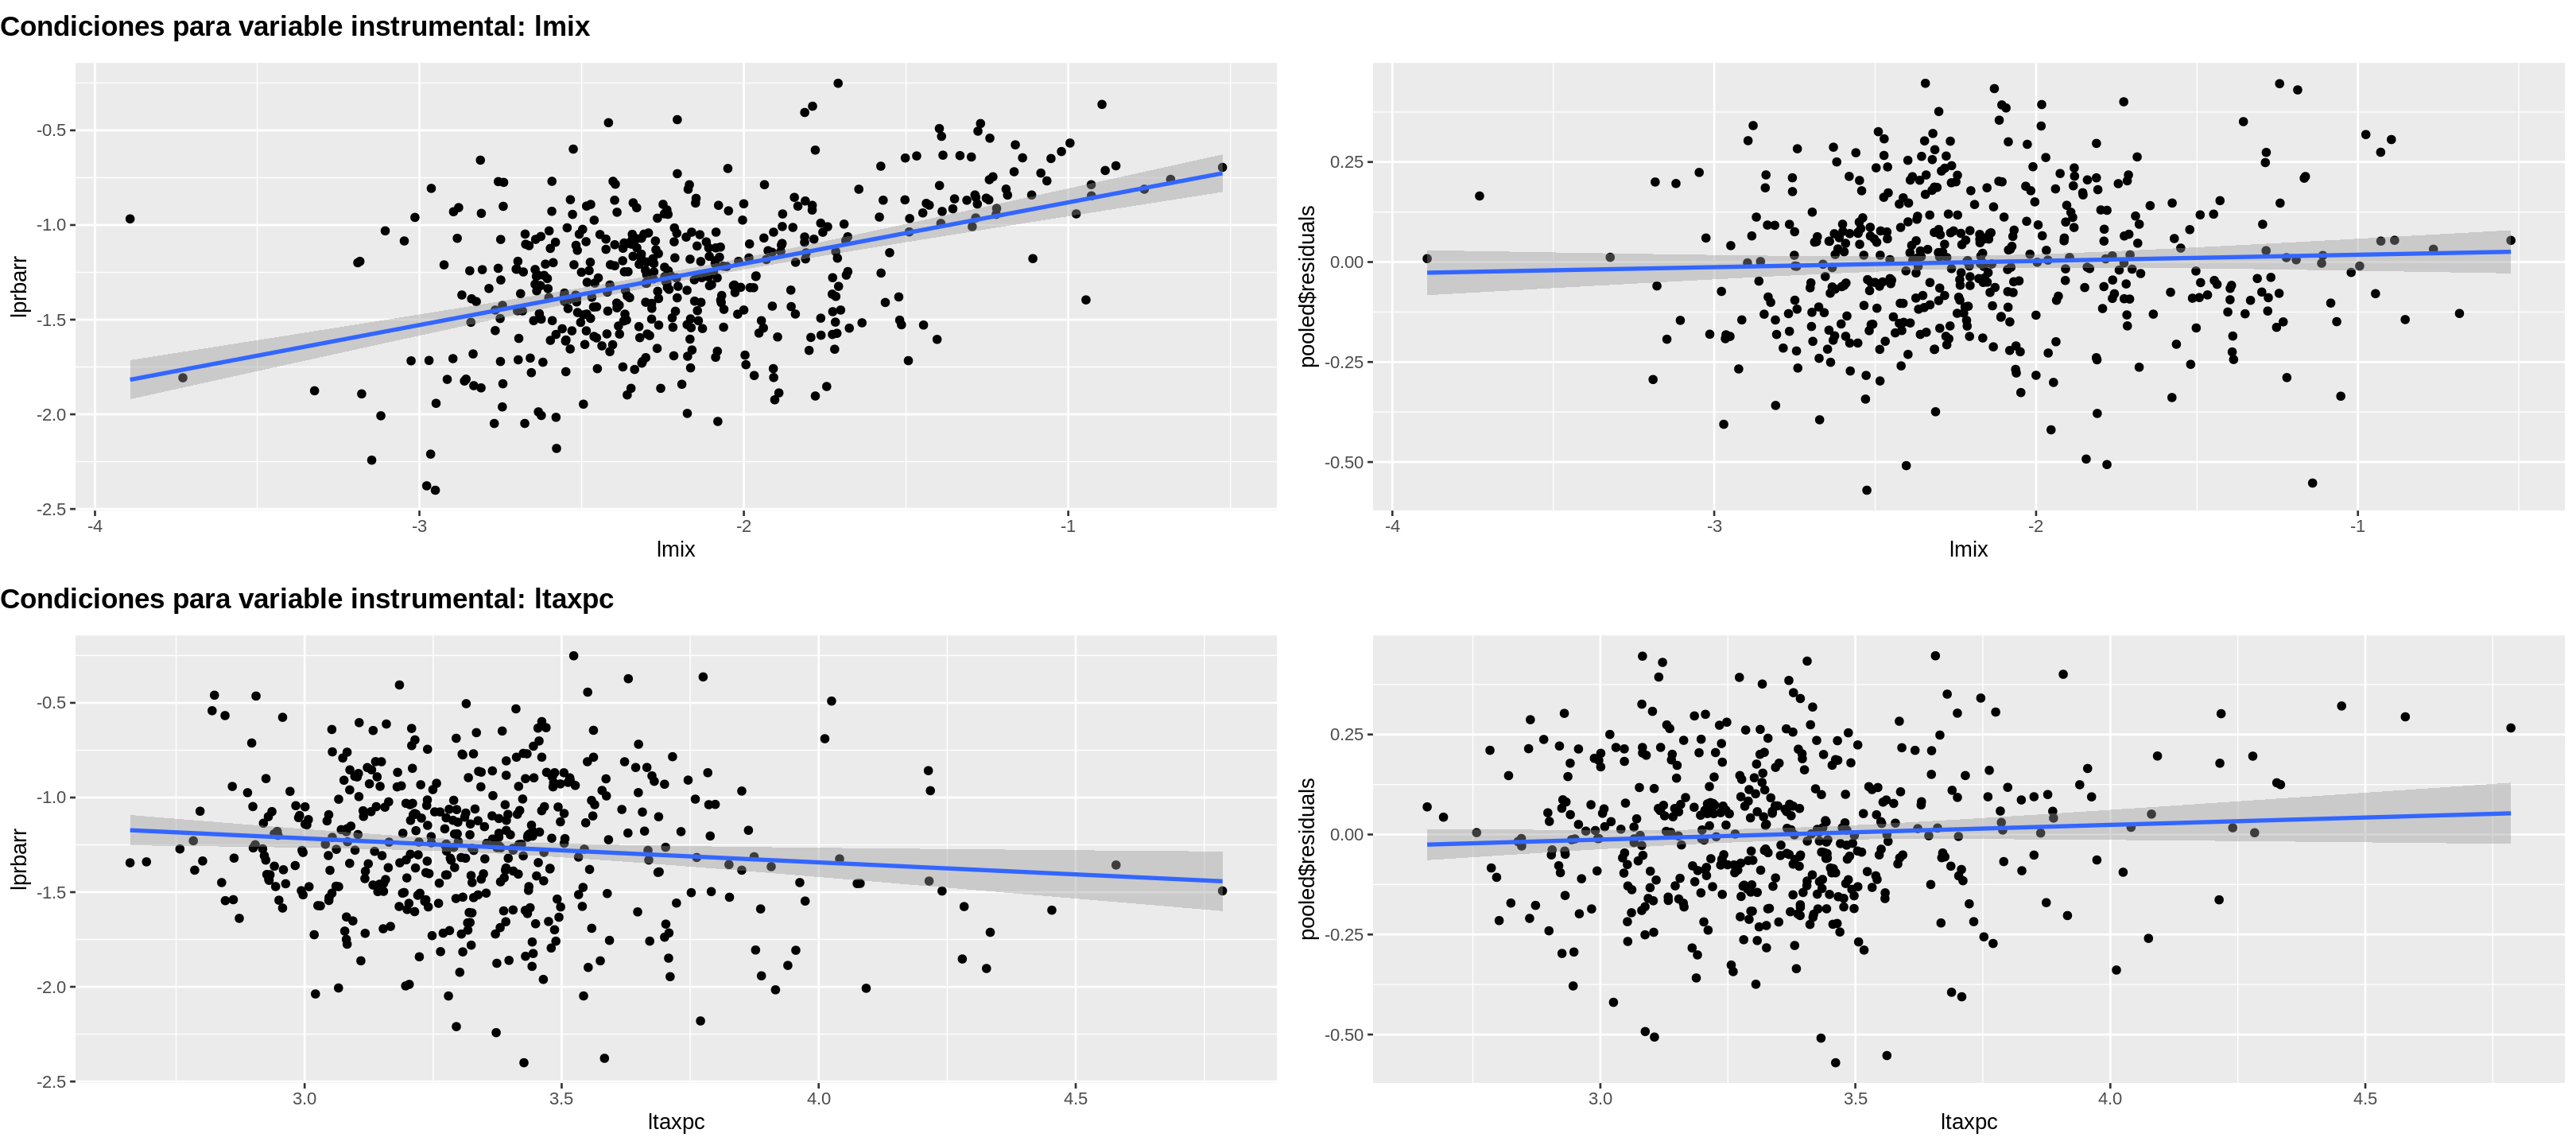

In [ ]:
# lmix
crime %>% ggplot(aes(lmix, lprbarr)) + geom_point() + geom_smooth(method=lm) -> p3
crime %>% ggplot(aes(lmix, pooled$residuals)) + geom_point() + geom_smooth(method=lm) -> p4

#ltaxpc
crime %>% ggplot(aes(ltaxpc, lprbarr)) + geom_point() + geom_smooth(method=lm) -> p5
crime %>% ggplot(aes(ltaxpc, pooled$residuals)) + geom_point() + geom_smooth(method=lm) -> p6


title <- ggdraw() + 
  draw_label(
    "Condiciones para variable instrumental: lmix",
    fontface = 'bold',
    x = 0,
    hjust = 0)
 title1 <- ggdraw() + 
  draw_label(
    "Condiciones para variable instrumental: ltaxpc",
    fontface = 'bold',
    x = 0,
    hjust = 0)   


plots_lmix <- plot_grid(p3,p4)
plots_ltaxpc <- plot_grid(p5,p6)
plot_grid(title, plots_lmix, title1, plots_ltaxpc, ncol=1, rel_heights = c(0.1, 1))

- La variable lmix es la más indicada para ser utilizada como instrumento, ya que está correlacionada con la probabilidad de arresto y su covarianza con el error es estadísticamente 0 con mayor robustez que la variable ltaxpc.

<h3>(g) Obtenga el estimador 2SLS de la tasa de arrestos, utilizando los instrumentos anteriores.

In [ ]:
#primera etapa
m1 <- plm(lprbarr ~ lmix, data=crime,
              index = c("county", "year"), model='pooling') 

m2 <- plm(lprbarr ~ ltaxpc, data=crime,
              index = c("county", "year"), model='pooling')

iv_var <-  predict(m1)
iv_var2 <- predict(m2) 

iv <- plm(lcrmrte ~ iv_var + lprbconv + lprbpris + lavgsen + polpc + ldensity + lwcon + wtuc + lwtrd + lwfir + lwser + lwmfg + lwfed + lwsta + lwloc + lpctymle + lpctmin + urban + central,
                    data= crime, index = c("county", "year"), model="pooling"
                      )
iv2 <- plm(lcrmrte ~ iv_var2 + lprbconv + lprbpris + lavgsen + polpc + ldensity + lwcon + wtuc + lwtrd + lwfir + lwser + lwmfg + lwfed + lwsta + lwloc + lpctymle + lpctmin + urban + central,
                    data= crime, index = c("county", "year"), model="pooling"
                      )



`stargazer(type="html", iv,iv2, title='Comparación 2SLS de las IV')`

<table style="text-align:center"><caption><strong>Comparación 2SLS de las IV</strong></caption>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"></td><td colspan="2"><em>Dependent variable:</em></td></tr>
<tr><td></td><td colspan="2" style="border-bottom: 1px solid black"></td></tr>
<tr><td style="text-align:left"></td><td colspan="2">lcrmrte</td></tr>
<tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">iv_var</td><td>-0.163<sup>**</sup></td><td></td></tr>
<tr><td style="text-align:left"></td><td>(0.080)</td><td></td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">iv_var2</td><td></td><td>-0.355</td></tr>
<tr><td style="text-align:left"></td><td></td><td>(0.412)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lprbconv</td><td>-0.135<sup>***</sup></td><td>-0.106<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.036)</td><td>(0.033)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lprbpris</td><td>-0.118<sup>**</sup></td><td>-0.105<sup>*</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.059)</td><td>(0.060)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lavgsen</td><td>0.095<sup>**</sup></td><td>0.100<sup>**</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.044)</td><td>(0.044)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">polpc</td><td>339.701<sup>***</sup></td><td>338.412<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(26.705)</td><td>(29.941)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">ldensity</td><td>0.356<sup>***</sup></td><td>0.381<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.028)</td><td>(0.027)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwcon</td><td>-0.048</td><td>-0.053</td></tr>
<tr><td style="text-align:left"></td><td>(0.062)</td><td>(0.062)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">wtuc</td><td>-0.0001</td><td>-0.00005</td></tr>
<tr><td style="text-align:left"></td><td>(0.00004)</td><td>(0.00004)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwtrd</td><td>-0.113<sup>*</sup></td><td>-0.117<sup>**</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.058)</td><td>(0.059)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwfir</td><td>-0.104</td><td>-0.105</td></tr>
<tr><td style="text-align:left"></td><td>(0.073)</td><td>(0.074)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwser</td><td>-0.062</td><td>-0.055</td></tr>
<tr><td style="text-align:left"></td><td>(0.038)</td><td>(0.038)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwmfg</td><td>0.176<sup>**</sup></td><td>0.192<sup>**</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.079)</td><td>(0.079)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwfed</td><td>0.030</td><td>0.047</td></tr>
<tr><td style="text-align:left"></td><td>(0.126)</td><td>(0.127)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwsta</td><td>-0.308<sup>***</sup></td><td>-0.298<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.086)</td><td>(0.087)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lwloc</td><td>0.387<sup>***</sup></td><td>0.326<sup>**</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.135)</td><td>(0.139)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lpctymle</td><td>0.162<sup>***</sup></td><td>0.174<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.061)</td><td>(0.064)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">lpctmin</td><td>0.218<sup>***</sup></td><td>0.208<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.013)</td><td>(0.013)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">urban</td><td>-0.109<sup>**</sup></td><td>-0.146<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.052)</td><td>(0.052)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">central</td><td>-0.102<sup>***</sup></td><td>-0.108<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.026)</td><td>(0.026)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td style="text-align:left">Constant</td><td>-4.636<sup>***</sup></td><td>-4.683<sup>***</sup></td></tr>
<tr><td style="text-align:left"></td><td>(0.564)</td><td>(0.602)</td></tr>
<tr><td style="text-align:left"></td><td></td><td></td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left">Observations</td><td>462</td><td>462</td></tr>
<tr><td style="text-align:left">R<sup>2</sup></td><td>0.785</td><td>0.783</td></tr>
<tr><td style="text-align:left">Adjusted R<sup>2</sup></td><td>0.776</td><td>0.774</td></tr>
<tr><td style="text-align:left">F Statistic (df = 19; 442)</td><td>84.892<sup>***</sup></td><td>84.054<sup>***</sup></td></tr>
<tr><td colspan="3" style="border-bottom: 1px solid black"></td></tr><tr><td style="text-align:left"><em>Note:</em></td><td colspan="2" style="text-align:right"><sup>*</sup>p<0.1; <sup>**</sup>p<0.05; <sup>***</sup>p<0.01</td></tr>
</table>

- Como era de esperar, el primer instrumento (lmix) resultó significativo al 5% debido a que esta cumplió con las condiciones de exogeneidad y aleatoriedad de forma más robusta.

# Tarea 1: Econometría Financiera

## Samuel Francisco ID 1062508


### Paquetes

In [137]:
# install.packages('fredr')
# install.packages('dplyr')
# install.packages('tibble')
# install.packages('ggplot2')
# install.packages('zoo')
# install.packages('cowplot')
install.packages('astsa')
install.packages('astsa')
install.packages('astsa')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [138]:
# Librerías
library(fredr)
library(purrr)
library(dplyr)
library(ggplot2)
library(zoo)
library(cowplot)
library(astsa)

In [84]:
# options(repr.plot.width = 15, repr.plot.height = 12)

#ignorar warnings
oldw <- getOption("warn")
options(warn = -1)

# volver a ver warnings
## options(warn = oldw)

In [3]:
FRED_API_KEY = "1d9db4862c4dcb665bde887f7ec71456"
fredr_set_key(FRED_API_KEY)

In [126]:
options(repr.plot.width = 20, repr.plot.height = 10)

In [45]:

# Importando datos del FRED

# data_oil <- fredr(
#   series_id = "DCOILWTICO",
#   observation_start = as.Date("2017-01-01"),
#   observation_end = as.Date("2022-05-01"),
#   frequency = "d",
#   realtime_start = NULL
# )

# data_sp500 <- fredr(
#   series_id = "SP500",
#   observation_start = as.Date("2017-01-01"),
#   observation_end = as.Date("2022-05-01"),
#   frequency = "d"
# )

# data_vix <- fredr(
#   series_id = "VIXCLS",
#   observation_start = as.Date("2017-01-01"),
#   observation_end = as.Date("2022-05-01"),
#   frequency = "d"
# )

### <h2> Ejercicio 1

In [115]:
p <- list(
  series_id = c("DCOILWTICO", "SP500", "VIXCLS"),
  frequency = c("d", "d", "d")
)

datos <- pmap_dfr(
  .l = p,
  .f = ~ fredr(series_id = .x, frequency = .y)
) %>% 
      filter(date > "2016-12-31" & date < "2022-05-01")


# wti <-  


In [116]:
data_wti <- datos %>% filter(series_id == "DCOILWTICO") %>% select(date,value)
data_sp <- datos %>% filter(series_id == "SP500") %>% select(date,value)
data_vix <- datos %>% filter(series_id == "VIXCLS") %>% select(date,value)

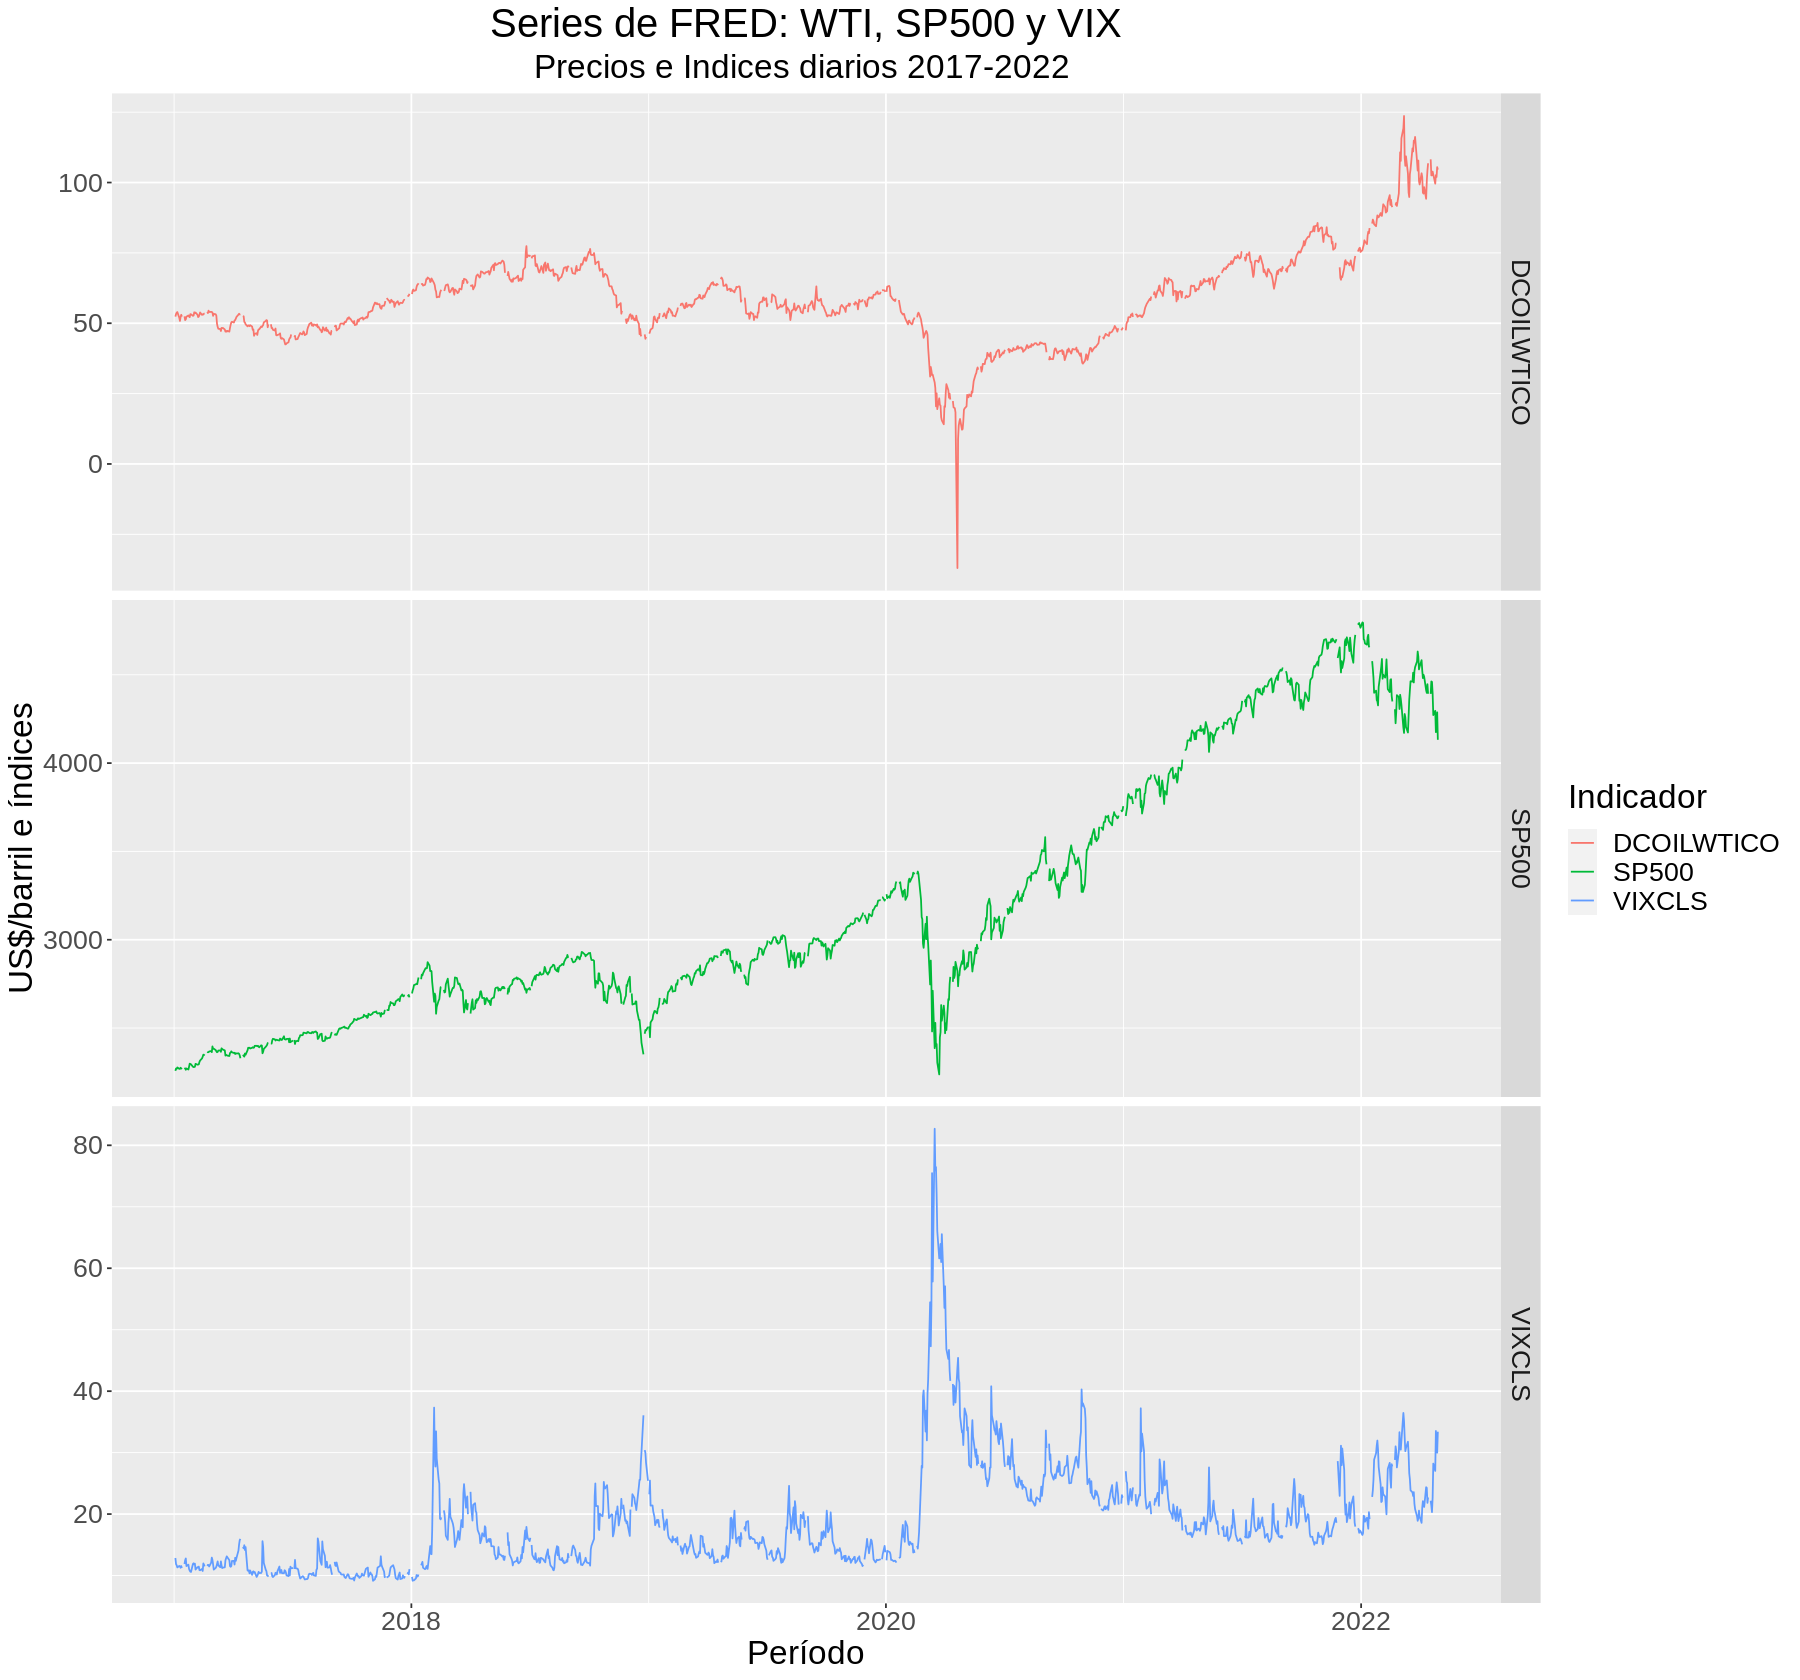

In [118]:
datos %>% ggplot(aes(x = date, y = value, color = series_id)) +
          geom_line() +
          labs(title="Series de FRED: WTI, SP500 y VIX", subtitle="Precios e Indices diarios 2017-2022 ", x = "Período", y = "US$/barril e índices", color = "Indicador") +
          theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5)) +
          facet_grid(series_id ~ ., scales="free_y") 


### <h2> Ejercicio 2

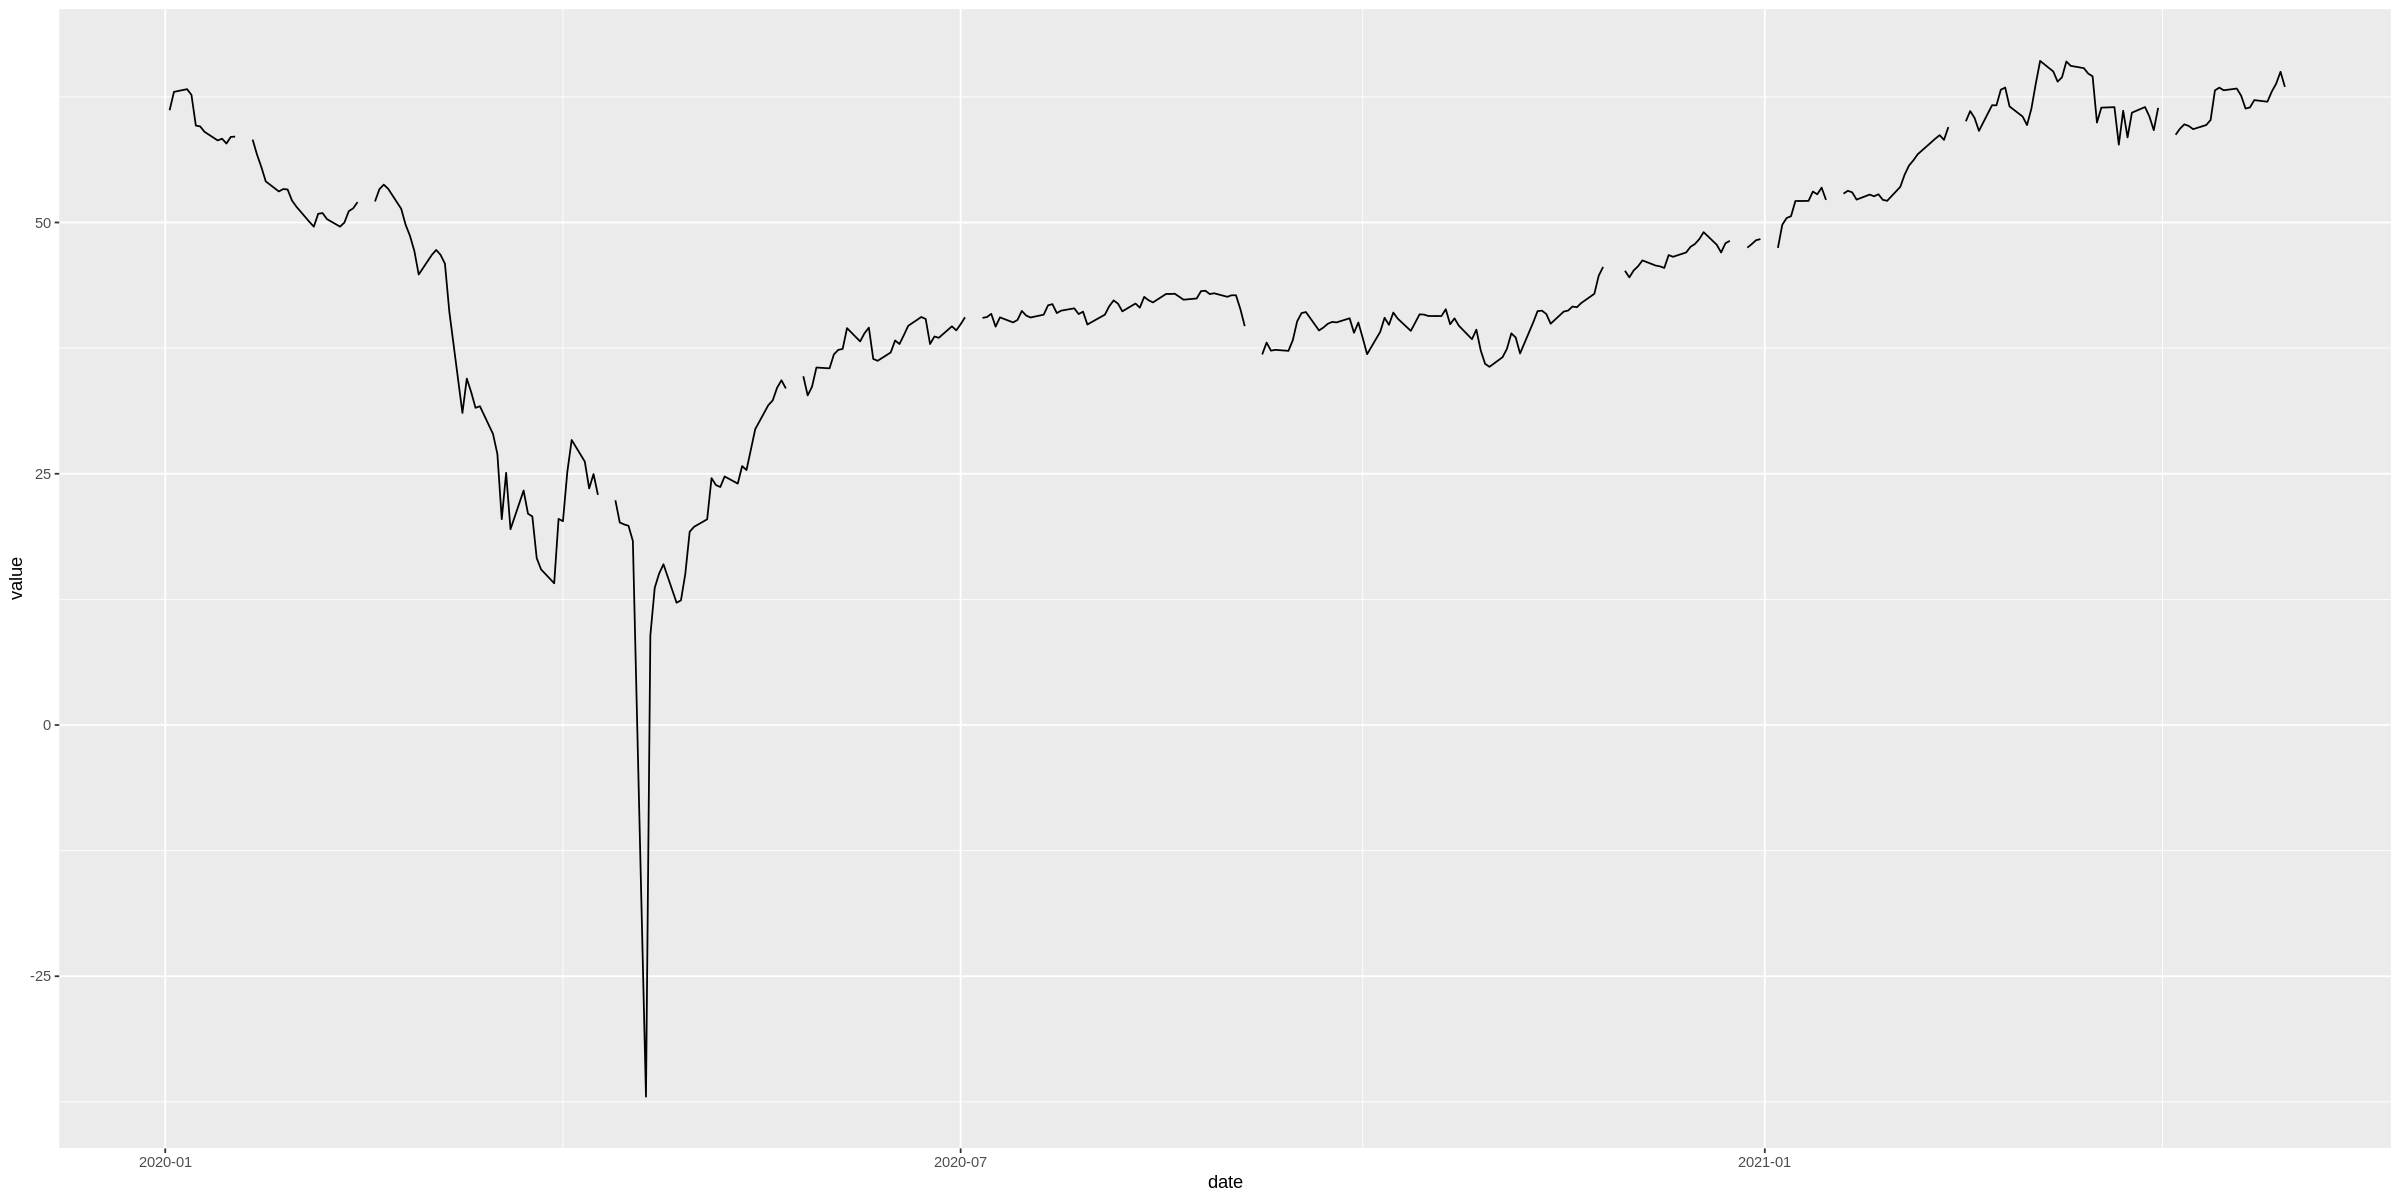

In [136]:
data_wti <- data_wti %>% 
  mutate(
    Rt = (value-lag(value,1))/lag(value,1)*100
  )
data_wti %>% filter(date > "2019-12-31" & date < "2021-05-01") %>% ggplot(aes(x = date, y = value)) + 
  geom_line()

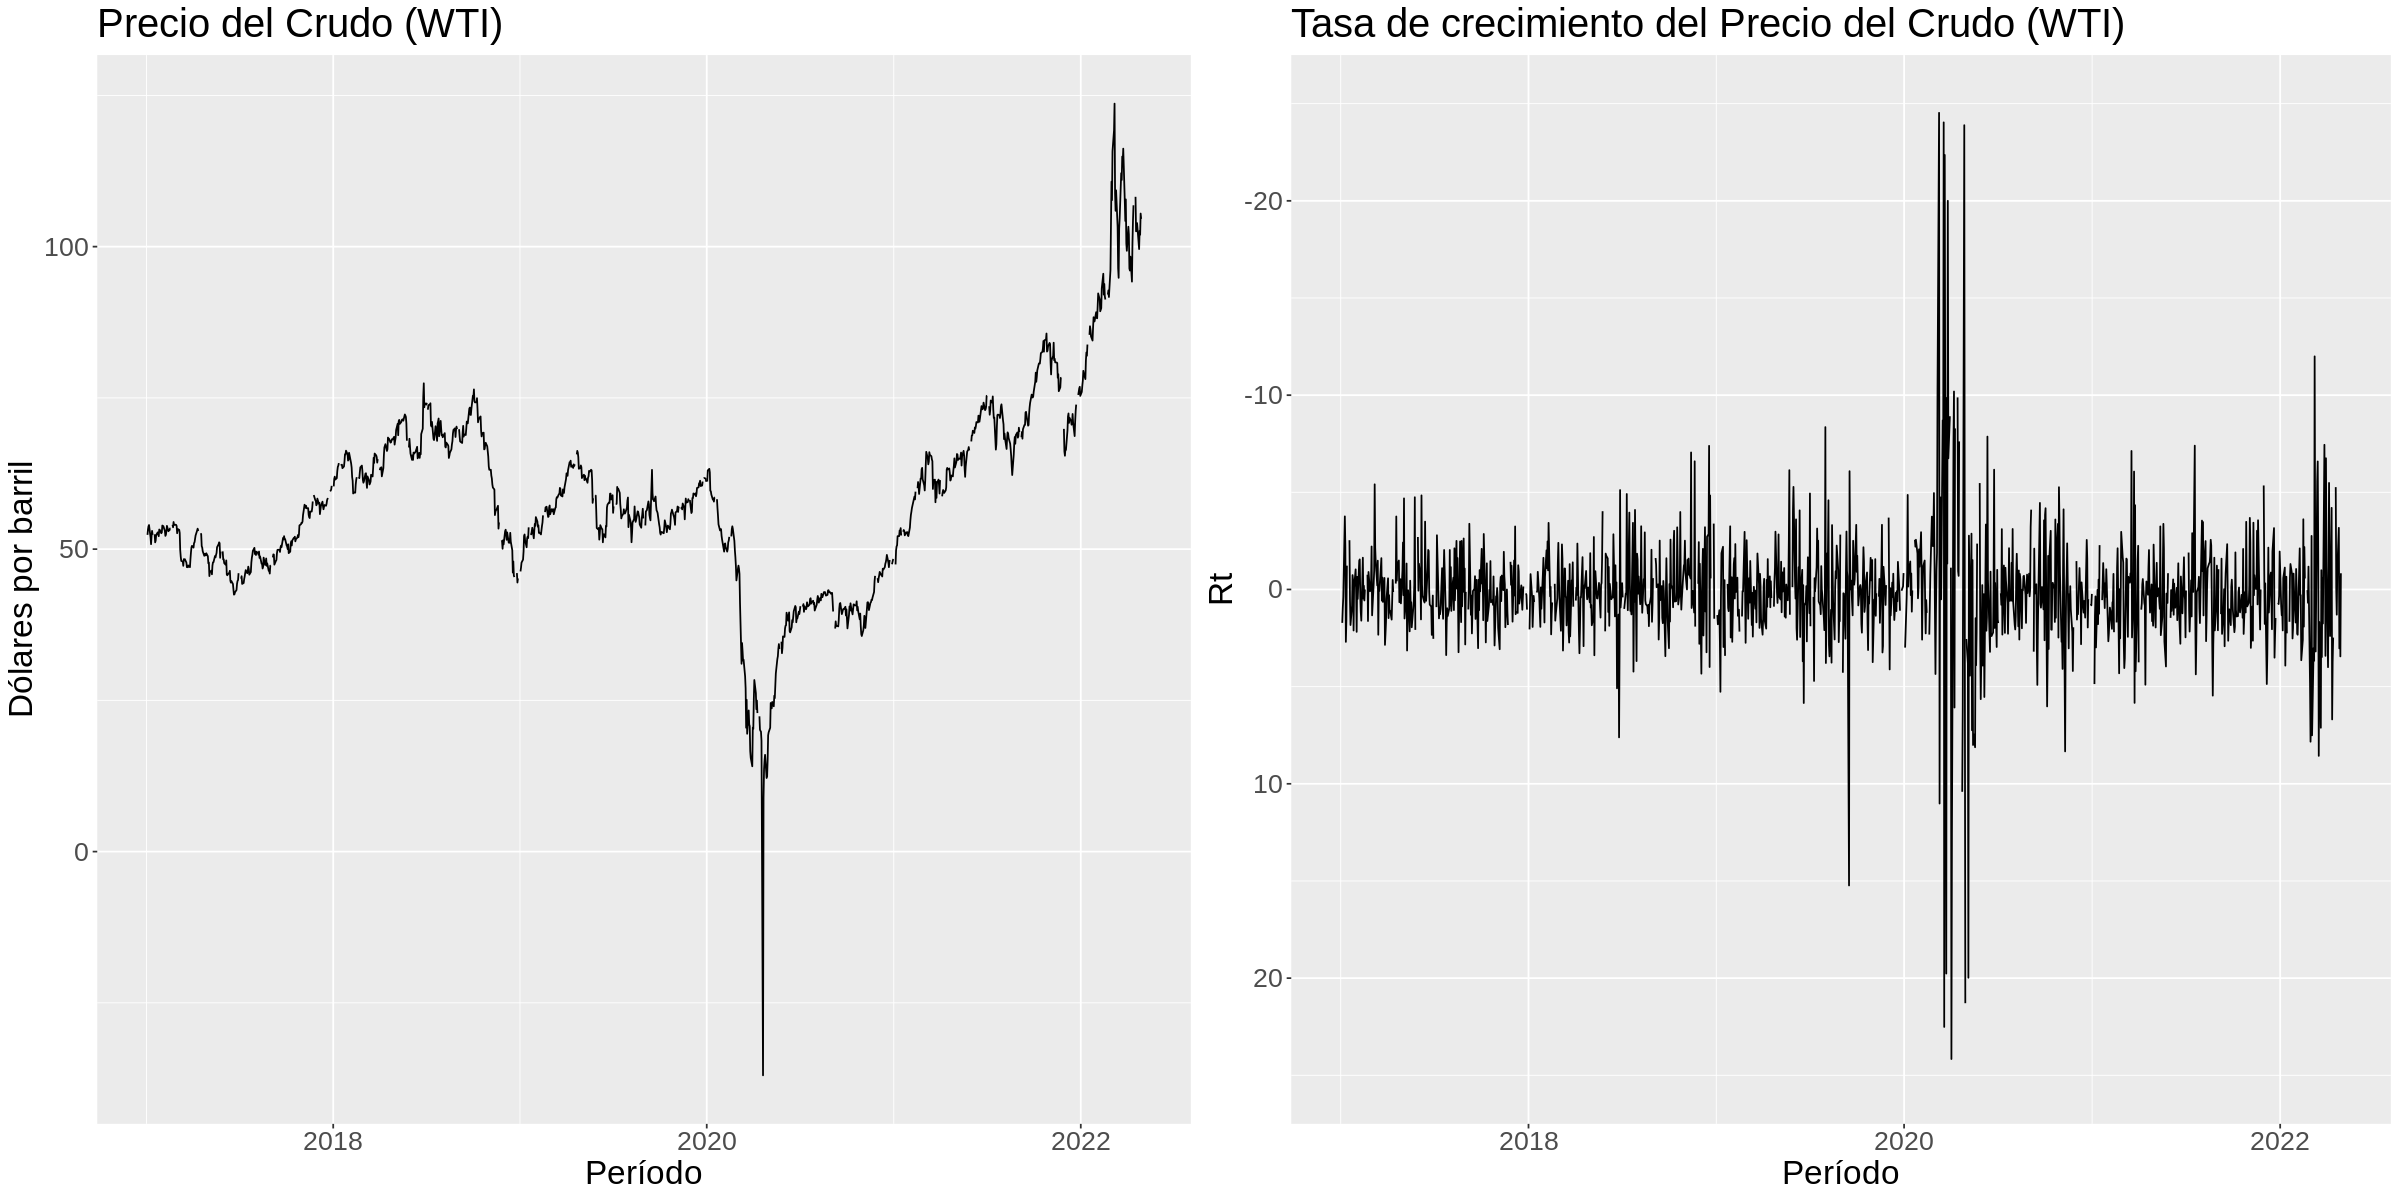

In [132]:
g1 <- ggplot(data_wti, aes(x = date, y = value)) + 
  geom_line() + 
  labs(title="Precio del Crudo (WTI)", x="Período", y="Dólares por barril") +
  theme(text = element_text(size = 20))

g2 <- ggplot(data_wti, aes(x = date, y = Rt)) + 
  geom_line() +  ylim(25,-25) +
  labs(title="Tasa de crecimiento del Precio del Crudo (WTI)", x="Período") +
  theme(text = element_text(size = 20))

plot_grid(g1,g2)

ACF,0.99,0.99,0.98,0.97,0.96,0.95,0.95,0.94,0.93,0.92
PACF,0.99,0.14,-0.10,0.03,-0.29,-0.17,0.61,-0.16,-0.32,0.23


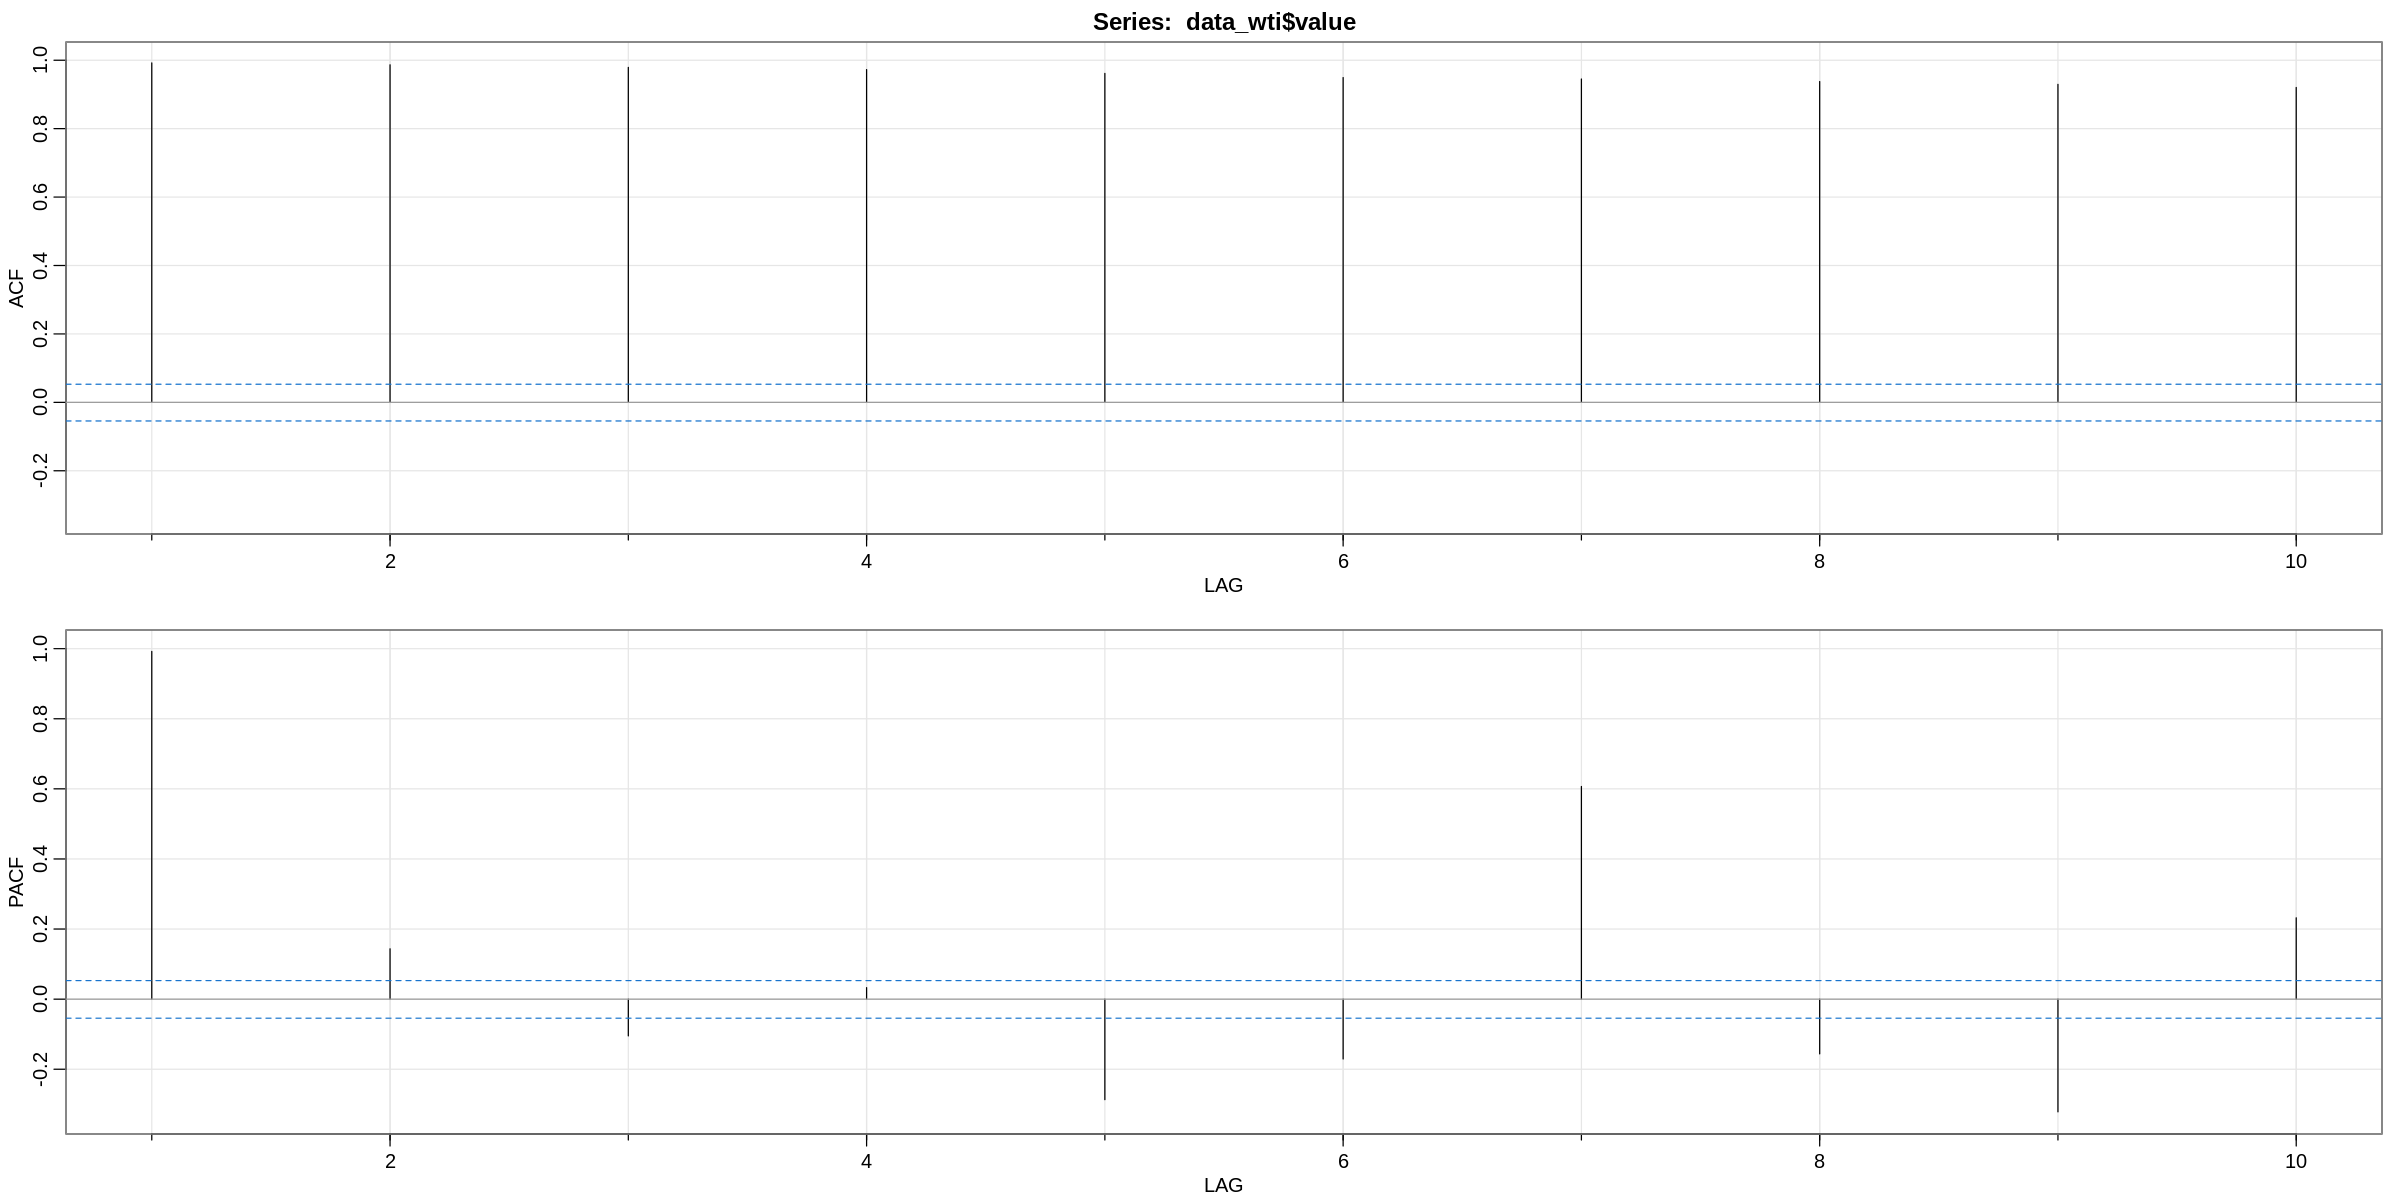

ACF,0.27,-0.12,-0.06,0.04,0.07,-0.01,-0.07,-0.07,0.02,0.00
PACF,0.27,-0.21,0.05,0.02,0.04,-0.03,-0.04,-0.04,0.03,-0.04


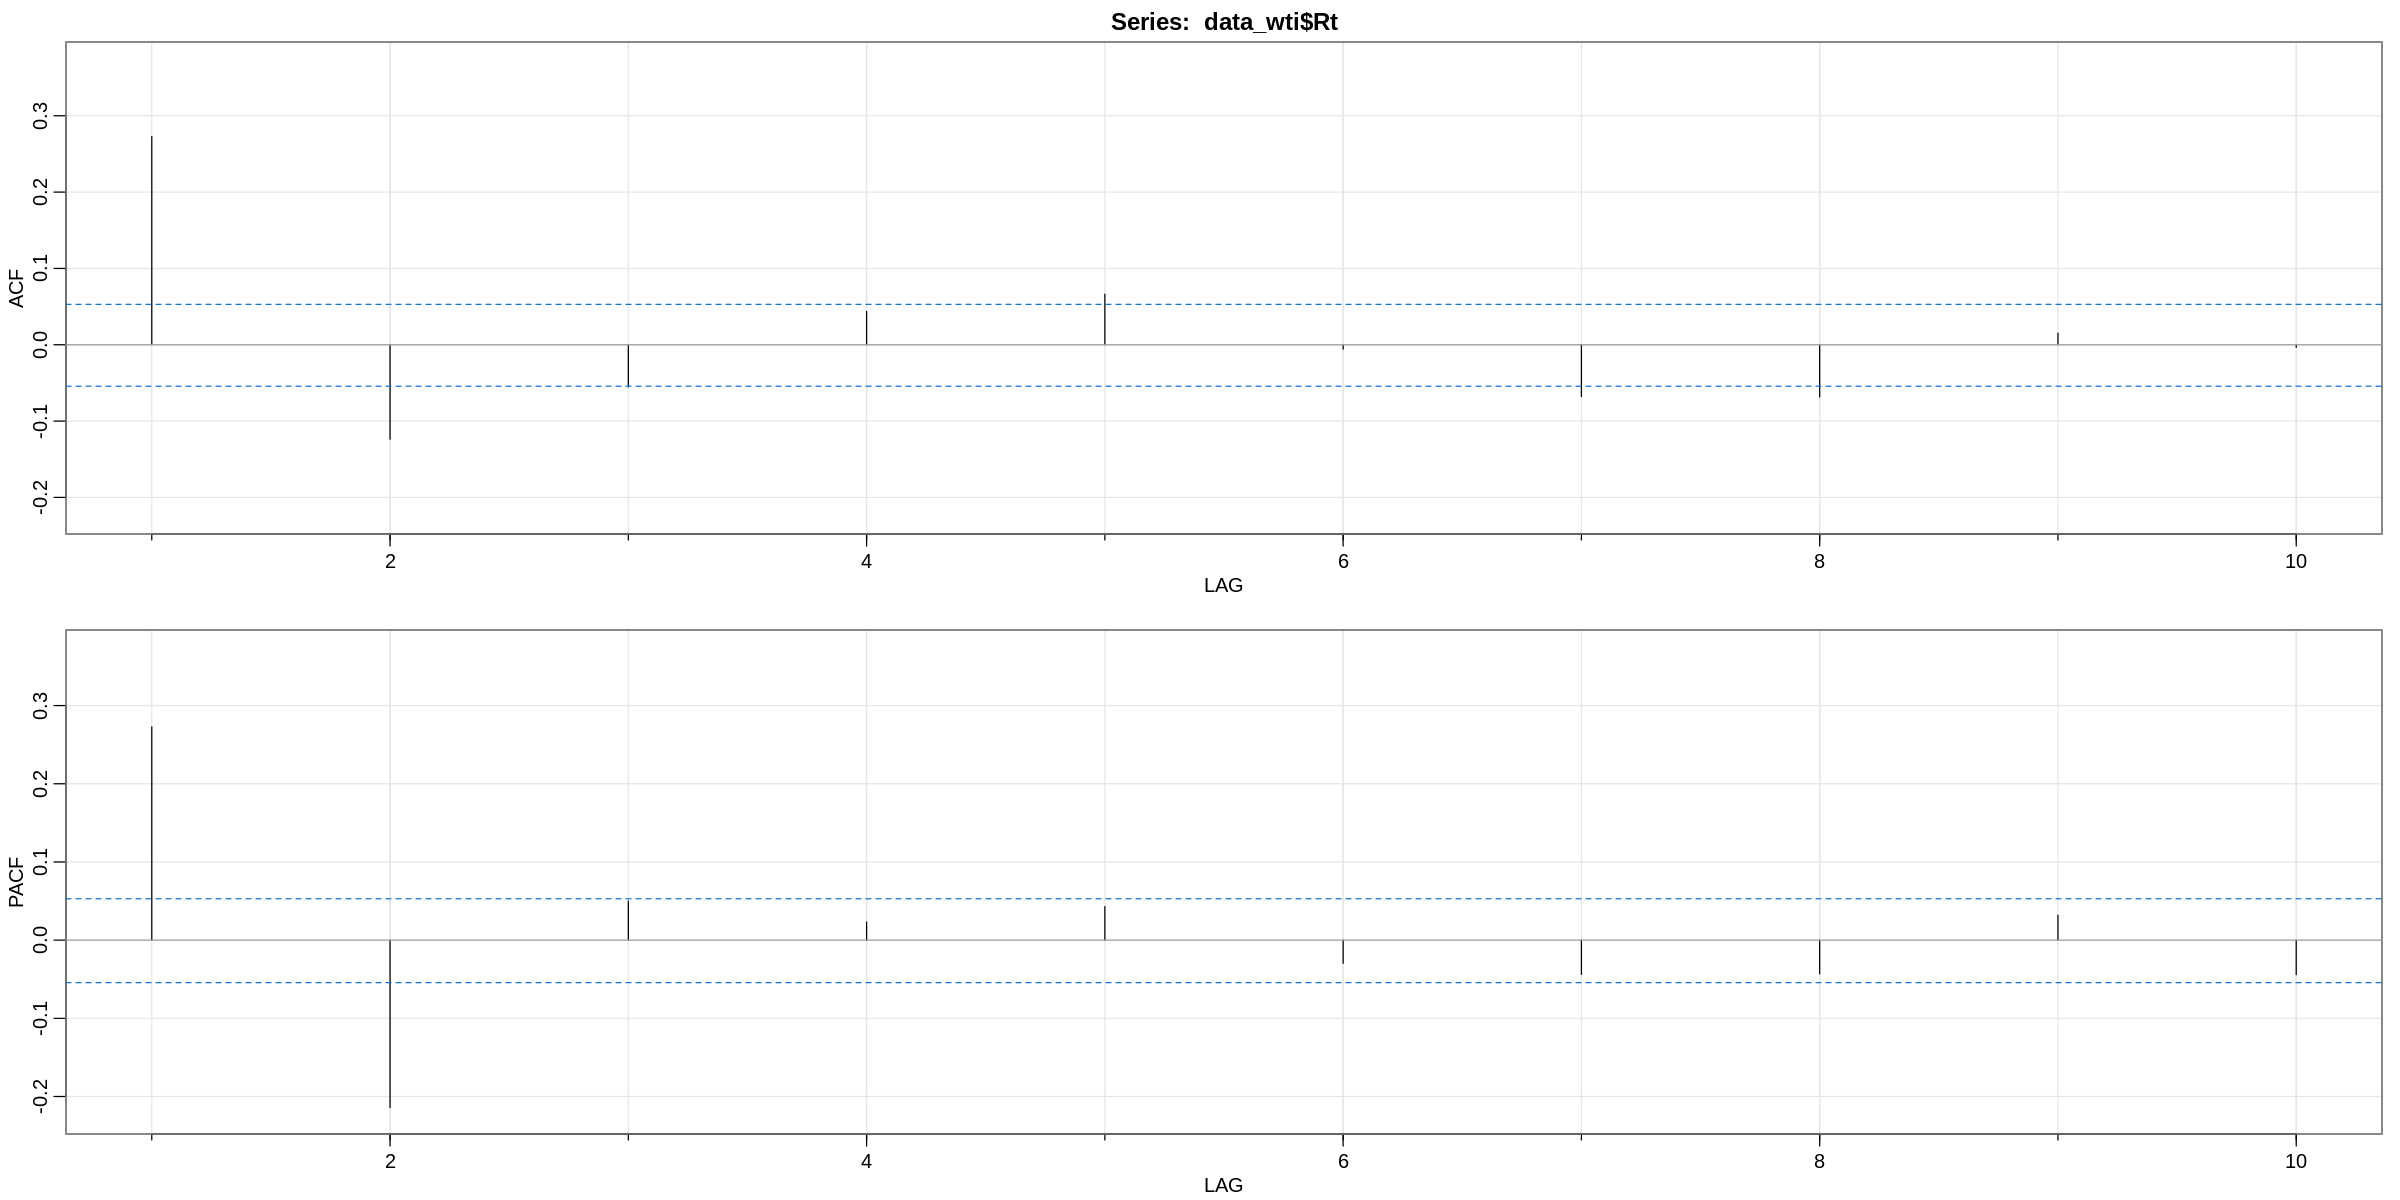

In [144]:
acf2(data_wti$value, max.lag = 10, plot=T)
acf2(data_wti$Rt, max.lag = 10, plot=T)

In [140]:
data_wti

date,value,Rt
<date>,<dbl>,<dbl>
2017-01-02,NA,NA
2017-01-03,52.36,NA
2017-01-04,53.26,1.7188694
2017-01-05,53.77,0.9575667
2017-01-06,53.98,0.3905524
2017-01-09,51.95,-3.7606521
2017-01-10,50.82,-2.1751684
2017-01-11,52.19,2.6957891
2017-01-12,53.01,1.5711822


### <h2> Ejercicio 3

### <h2> Ejercicio 4

In [ ]:
data_wti %>%